# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

print(type(y_test))
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

<class 'numpy.ndarray'>
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

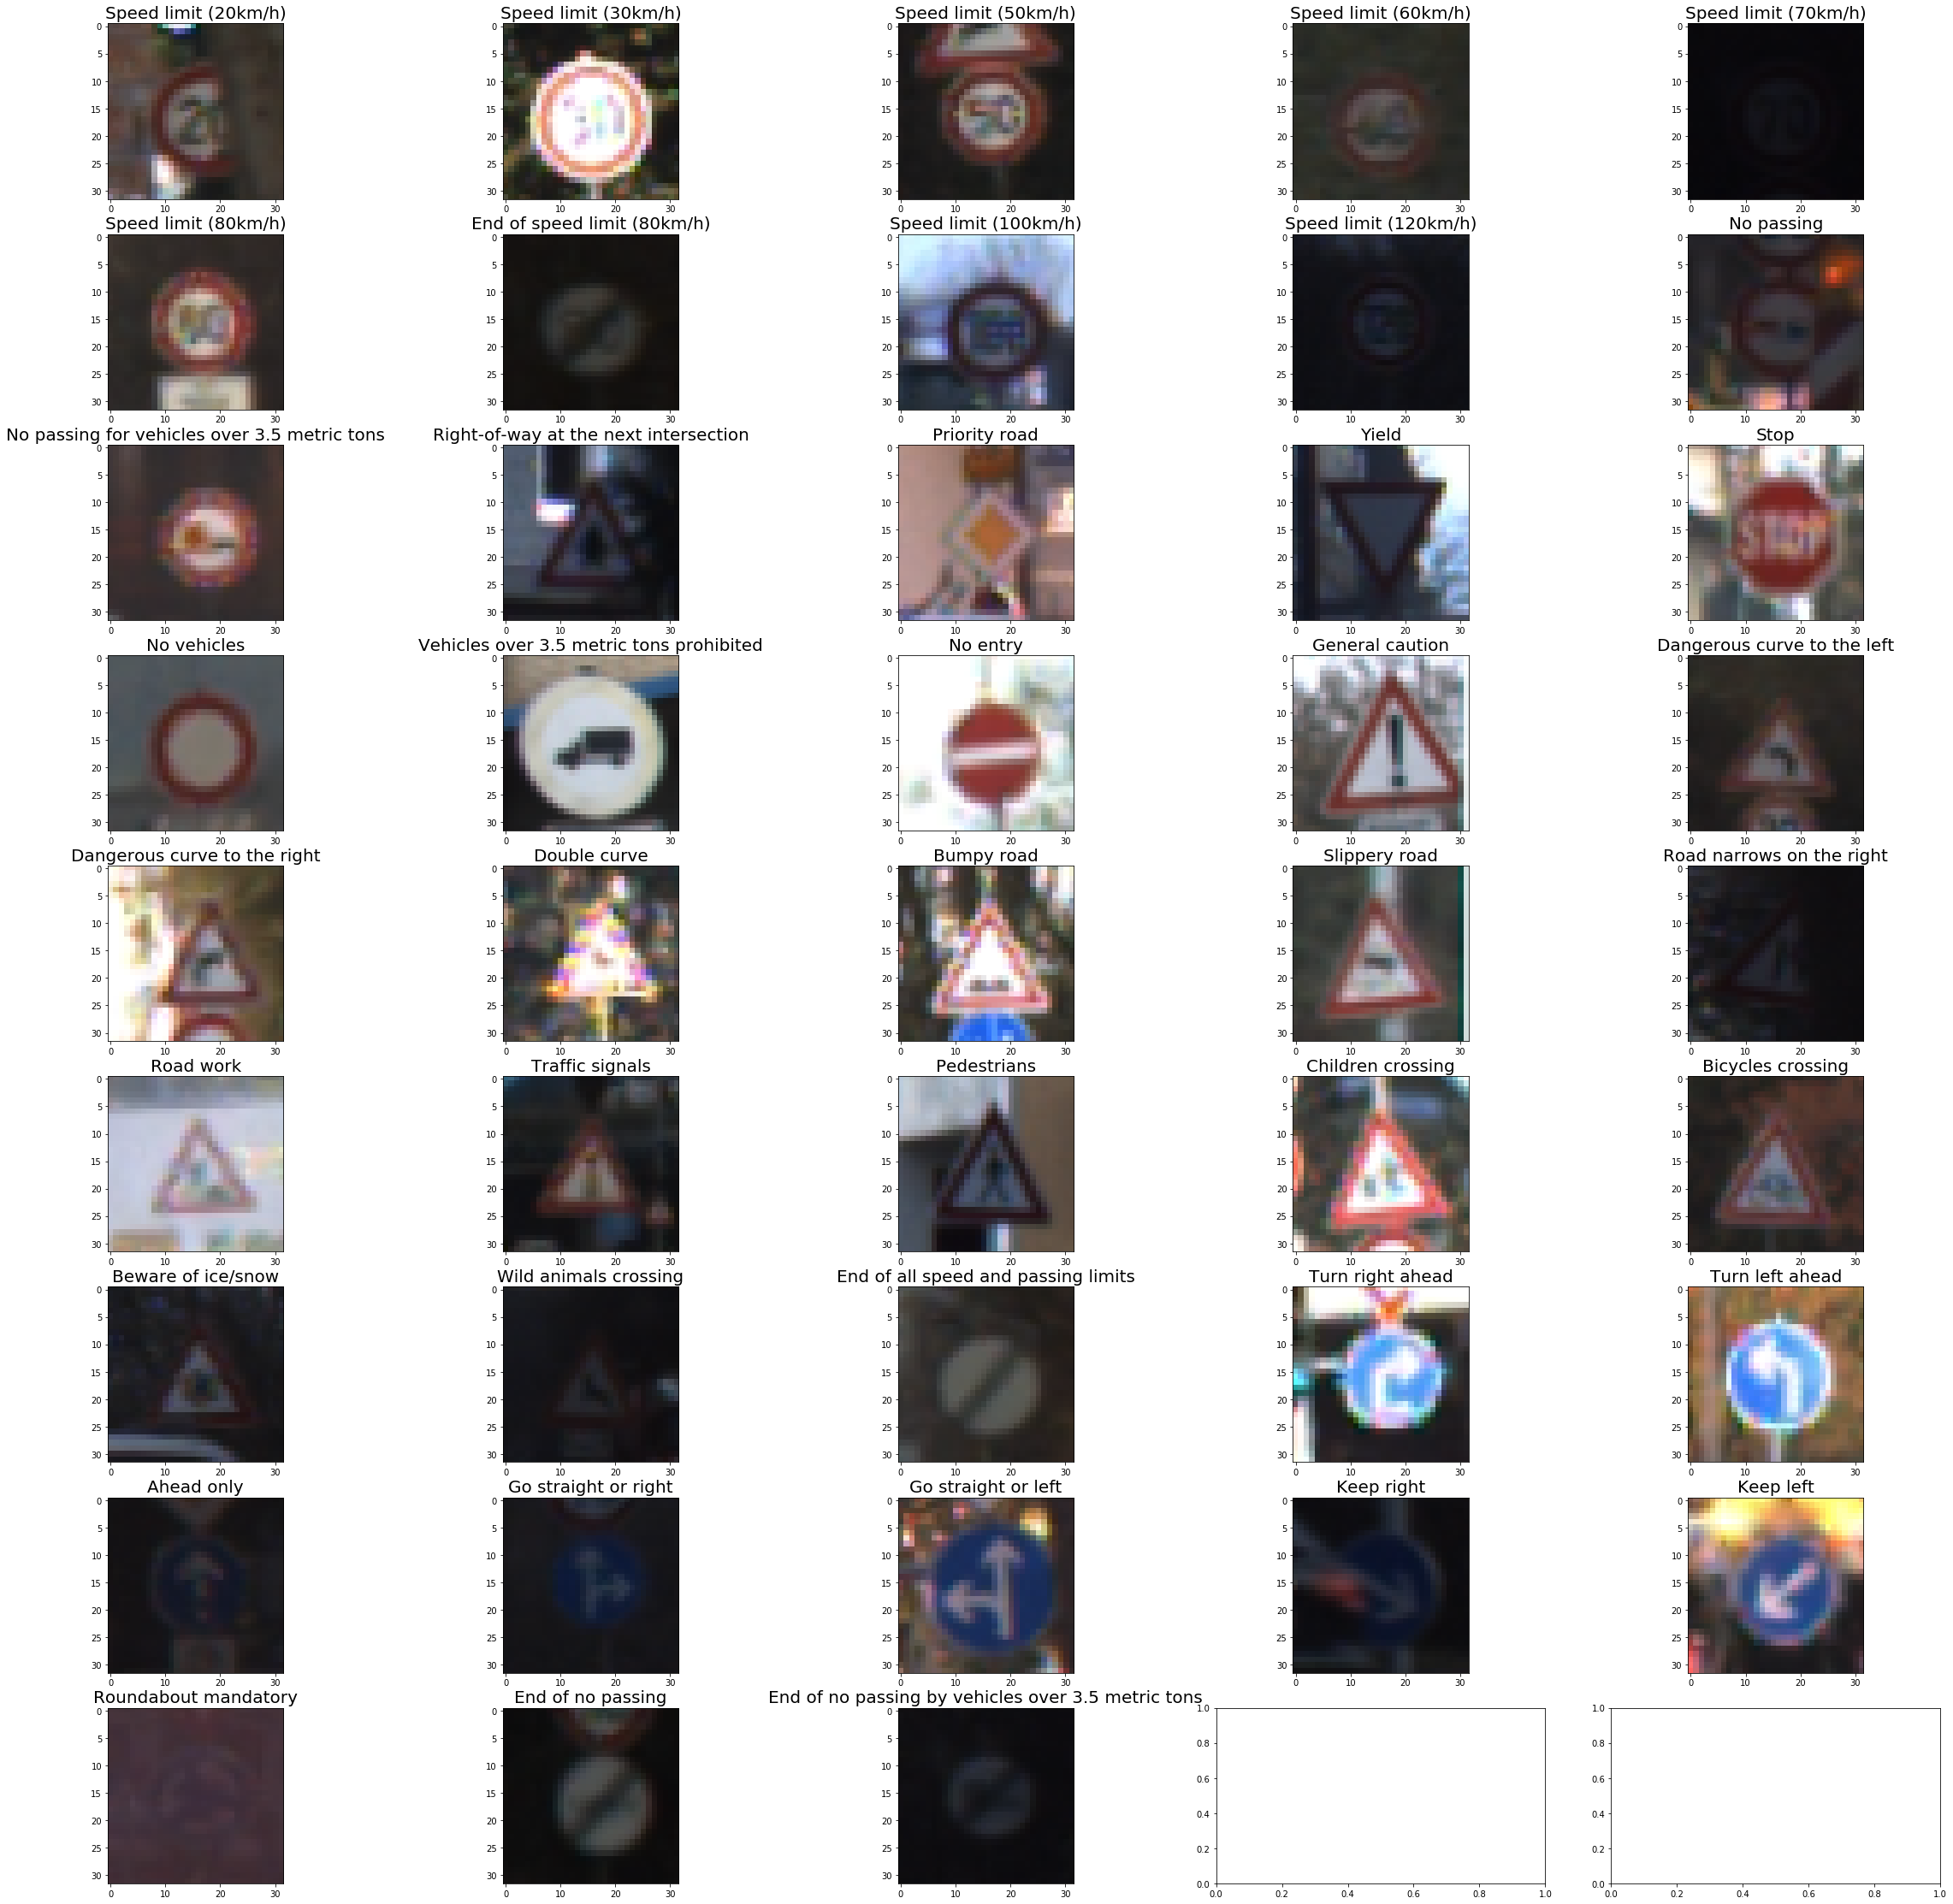

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
f, axarr = plt.subplots(9, 5, figsize = (40,40))
sign_name = pd.read_csv("signnames1.csv")
for i in range(43):
    
    j = y_valid.tolist().index(i)
    image = X_valid[j]

    axarr[i//5, i%5].grid(False)
    axarr[i//5, i%5].set_title(sign_name['SignName'][i], fontsize=20)
    axarr[i//5, i%5].imshow(image)


plt.show()

Above is a plot of the images (32X32) of the 43 different Traffic sign from the original dataset. Some images are just close to totally black color, further image process should help, see next step! 

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


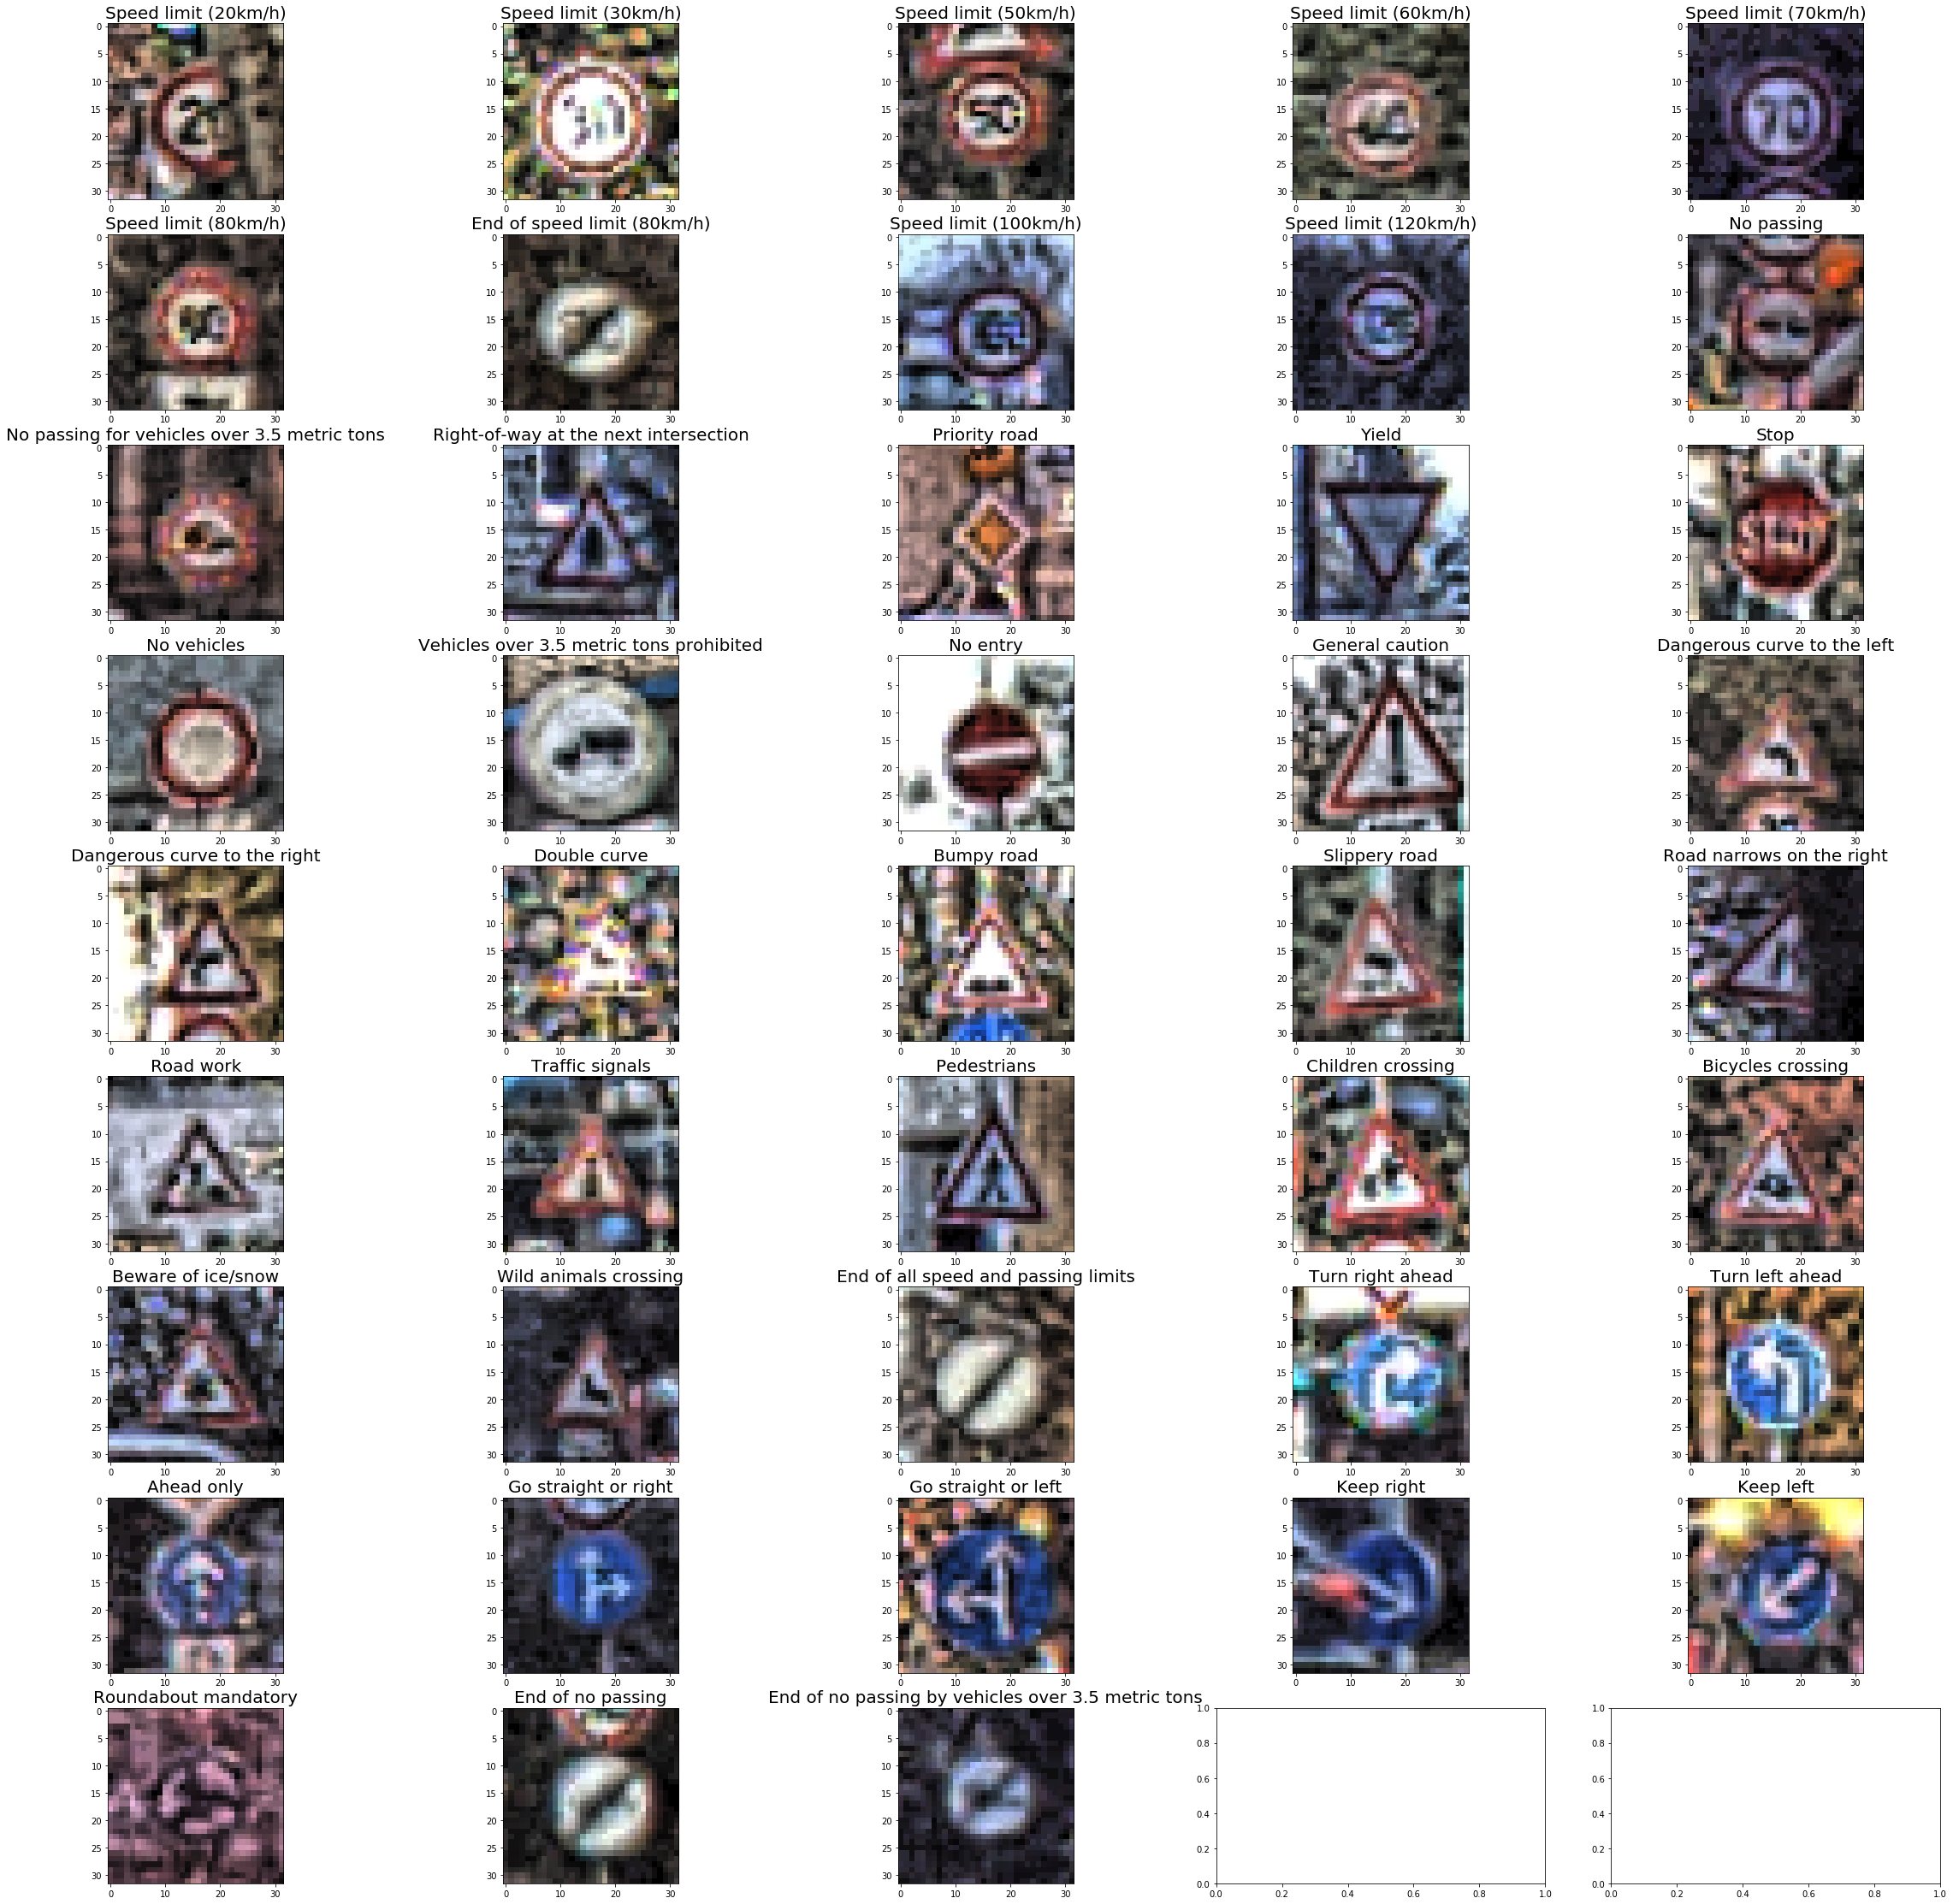

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from skimage import exposure
f, axarr = plt.subplots(9, 5, figsize = (40,40))
sign_name = pd.read_csv("signnames1.csv")
for i in range(43):
    
    j = y_valid.tolist().index(i)
    image = X_valid[j]
    image = exposure.equalize_adapthist(image)
        #data_temp[i]= image
    image = (image*255).astype(np.uint8)
    axarr[i//5, i%5].grid(False)
    axarr[i//5, i%5].set_title(sign_name['SignName'][i], fontsize=20)
    axarr[i//5, i%5].imshow(image)


plt.show()

After applying the exposure method on the same 43 images, the traffic sign of the previous low contrast images become much better. 
One might say it is only for human eyes, maybe not for machine, but I actually found by using the exposure method, the machine can learn much faster and more precisely. This make sense since the exposure method emphasize the contrast and edges, which then the machine can learn to detect these features through the CNN. 

Couple things I tried not shown here: I have also tried to use the normalize method, but I don't find it improve the learning. Also I also tried to reduce the RGB to gray scale, it does not improve the learning also. Reducing from the RGB to gray scale does help to reduce the computation time, but I just stick to the original RGB format. 

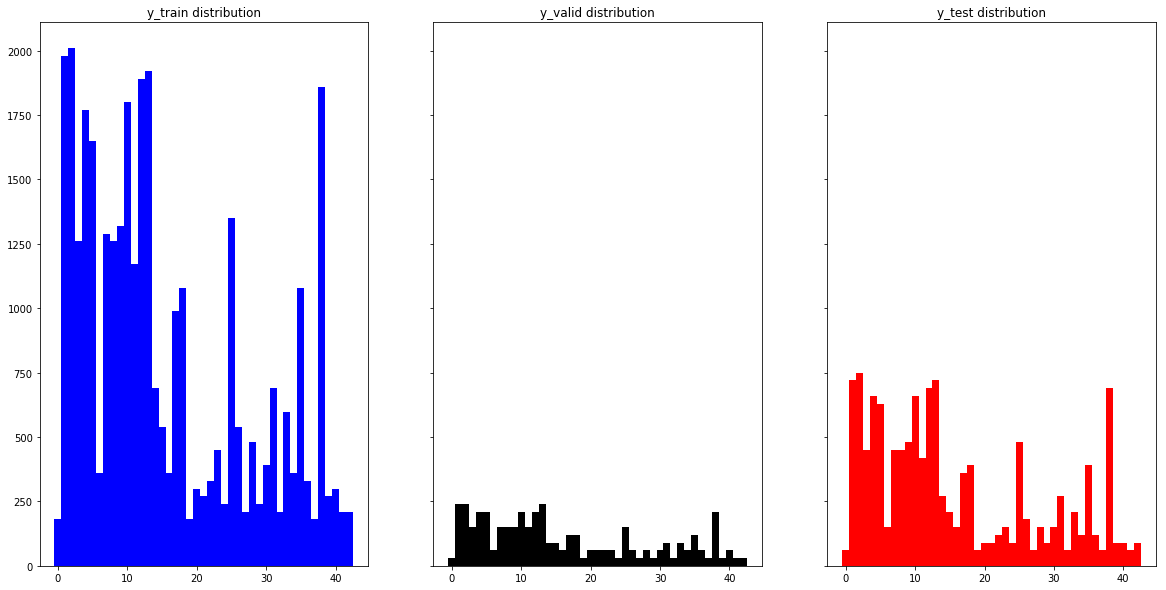

In [4]:


unique, counts = np.unique(y_train, return_counts=True)
#plt.subplot(131)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,10))
axes[0].bar(unique, counts, 1, color="blue") 
axes[0].set_title('y_train distribution')


unique, counts = np.unique(y_valid, return_counts=True)
axes[1].bar(unique, counts, 1, color="black") 
axes[1].set_title('y_valid distribution')
unique, counts = np.unique(y_test, return_counts=True)
axes[2].bar(unique, counts, 1, color="red") 
axes[2].set_title('y_test distribution')
plt.show()
plt.show()

By looking at the distribution of the dataset over the 43 traffic signs, it shows the dataset is not uniform distributed. 


(300, 451, 3)


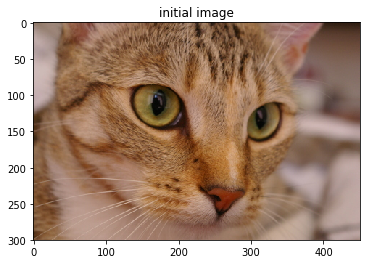

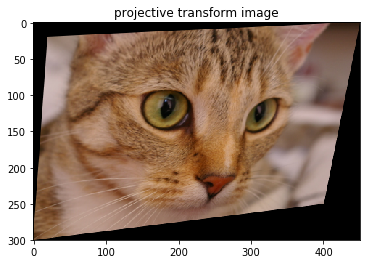

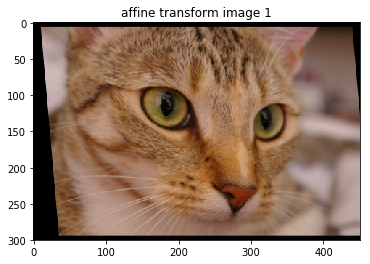

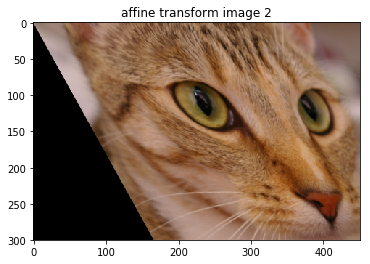

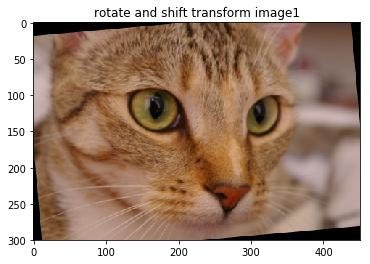

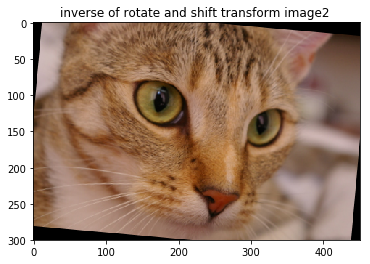

In [11]:
# some exploration about what image transformation to use for data augmentation.

from skimage import data
from skimage import transform
from skimage.transform import AffineTransform, ProjectiveTransform
import numpy as np
import matplotlib.pyplot as plt

image = data.chelsea()
y, x = np.array(image.shape[:2])
shift_y, shift_x = np.array(image.shape[:2]) / 2.
print(image.shape[:3])
tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(5))
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])
#aff_transform = AffineTransform(matrix=None, scale=None, rotation=5, shear=3, translation=[-10,10])
aff_transform = AffineTransform(matrix=None, scale=[1.05,1.05], rotation=np.deg2rad(0), shear=np.deg2rad(5), translation=[(1/1.05-1)*x/2,(1/1.05-1)*y/2])
aff_transform1 = AffineTransform(matrix=None, scale=None, rotation=np.deg2rad(5), shear=0.5, translation=None)
P_transform = ProjectiveTransform()
P_transform.estimate(np.array(((20,20),(0,y), (x-50,y-50),(x,0))), np.array(((0,0),(0,y), (x,y),(x,0))) )

plt.imshow(image)
plt.title('initial image')
plt.show()

image_p = transform.warp(image, P_transform)
plt.title('projective transform image')
plt.imshow(image_p)
plt.show()

image_aff = transform.warp(image, aff_transform)
plt.title('affine transform image 1')
plt.imshow(image_aff)
plt.show()

image_aff = transform.warp(image, aff_transform1)
plt.title('affine transform image 2')
plt.imshow(image_aff)
plt.show()
image_rotated = transform.warp(image, (tf_shift + (tf_rotate + tf_shift_inv)))

plt.title('rotate and shift transform image1')
plt.imshow(image_rotated)
plt.show()

image_rotated = transform.warp(image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
plt.title('inverse of rotate and shift transform image2 ')
plt.imshow(image_rotated)
plt.show()

del(data)

In [12]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage.transform import AffineTransform, ProjectiveTransform
from skimage.transform import warp
from skimage import exposure
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import normalize, scale

%matplotlib inline


def normalize_data(data):
    x = data[0, :,:,1].shape[0]
    y = data[0, :,:,1].shape[1]
    channel = len(data[0,0,0,:])
    data = data.astype(float)
    
    for k, image in enumerate(data):        
        for color in range(channel):
            image_norm = image[:,:,color].reshape(x*y,)
            image_norm = scale(image_norm, axis=0, with_mean=True, with_std=True)
            data[k,:,:,color] =image_norm.reshape(x, y)
    return data


def contrast_all_image(data, num = 10000, train_contrast_datafile = "train_contrast_data.p"):
    #data_temp=np.empty([len(data),32,32,3])
    data_temp2=np.empty([len(data),32,32,3])
    for i in range(len(data)):
        image = exposure.equalize_adapthist(data[i])
        #data_temp[i]= image
        data_temp2[i] = (image*255).astype(np.uint8)
        if ((i+1)%num) == 0:
            print("process over: {}".format(i+1))
            #plt.figure(figsize=(3,3))
            #plt.grid(False)
            #plt.imshow(data_temp[i])
            #train_contrast_datafile = "train_contrast_data.p"
            #pickle.dump({"features": data_temp}, open(train_contrast_datafile, "wb"))
        
    return  data_temp2
# increse sample size by rotate the sample a little bit.
def increase_image_size(data, y, lower_bound):
    
    angle =[5, -5, 10, -10]
    unique, counts = np.unique(y, return_counts=True)
    for i in range(len(unique)):
        counts_temp = counts[i]
        angle_n = 0

        while counts_temp < lower_bound and angle_n < len(angle):
            angle0 = angle[angle_n]
            data_2 = data[np.where(y == unique[i])]
            data_3 = data_2.copy()

            for j in range(len(data_2)):
                data_3[j] = scipy.ndimage.rotate(data_2[j], angle0, reshape=False)
                y = np.append(y, unique[i])
            
            data = np.concatenate((data, data_3))
            
            angle_n += 1
            counts_temp += len(data_3) 
    
    return data, y

def projective_transform_image(data0, y_data, fuzzy, add_counts):
    
    y, x, channel = data0[0].shape 

    fuzzyX = fuzzy*x
    fuzzyY = fuzzy*y
    P_transform = ProjectiveTransform()
    
    tl_x, tl_y = random.uniform(-fuzzyX, fuzzyX), random.uniform(-fuzzyY, fuzzyY)
    tr_x, tr_y = x + random.uniform(-fuzzyX, fuzzyX),  random.uniform(-fuzzyY, fuzzyY)
    br_x, br_y = x + random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
    tb_x, tb_y = random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
    
    unique, counts = np.unique(y_data, return_counts=True)

    
    for i in range(len(unique)):
        print("currently processing label: {}".format(i))
        counts_temp = counts[i]

        data_2 = data0[np.where(y_data == unique[i])]
        data_3 = data_2.copy()   


        
        while counts_temp < add_counts[i]:


            for j in range(len(data_2)):
                tl_x, tl_y = random.uniform(-fuzzyX, fuzzyX), random.uniform(-fuzzyY, fuzzyY)
                tr_x, tr_y = x + random.uniform(-fuzzyX, fuzzyX),  random.uniform(-fuzzyY, fuzzyY)
                br_x, br_y = x + random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
                tb_x, tb_y = random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
              #  print(np.array(((tl_x,tl_y),(tr_x,tr_y), (br_x,br_y),(tb_x,tb_y))), \
              #                       np.array(((0,0),(x,0), (x,y),(0,y))) )
                
                P_transform.estimate(np.array(((tl_x,tl_y),(tb_x,tb_y), (br_x,br_y),(tr_x,tr_y))), \
                                     np.array(((0,0),(0,y), (x,y),(x,0))) )

                image2 = transform.warp(data_2[j], P_transform, output_shape =(x,y,3), order = 1, mode = 'edge')

                data_3[j] = image2*255
                #print(j)

                #plt.figure(figsize=(3,3))
                #plt.grid(False)
                #print(data_3[j][10,10,:])
                #plt.imshow(data_3[j])

                y_data = np.append(y_data, unique[i])
            
            data0 = np.concatenate((data0, data_3))
            

            counts_temp += len(data_3) 

    
    return data0, y_data
            
X_test = contrast_all_image(X_test, num = 10000, train_contrast_datafile = "test_contrast_data.p")
X_valid = contrast_all_image(X_valid, num = 10000, train_contrast_datafile = "valid_contrast_data.p")
X_train = contrast_all_image(X_train, num = 10000, train_contrast_datafile = "train_contrast_data.p")    
        
    



    

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


process over: 10000
process over: 10000
process over: 20000
process over: 30000


currently processing label: 0


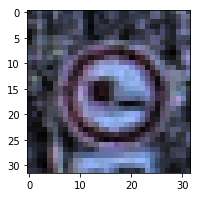

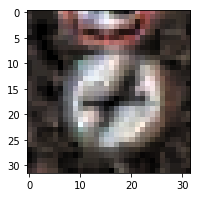

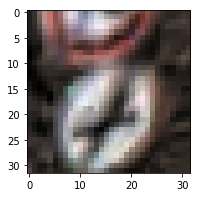

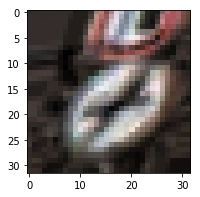

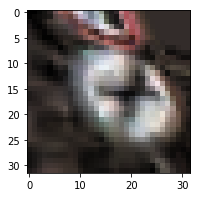

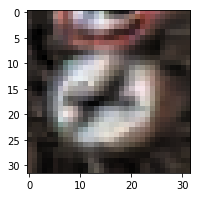

In [16]:
X_valid = X_valid.astype(np.uint8)
X_train = X_train.astype(np.uint8)
X_test = X_test.astype(np.uint8)
index = random.randint(0, len(X_train))

image = X_train[index].squeeze()


plt.figure(figsize=(3,3))
plt.grid(False)
plt.imshow(image)


data_temp, y_temp = X_train[0:1], y_train[0:1]

add_counts = [5]
unique, counts = np.unique(y_temp, return_counts=True)

data_temp, y_temp = projective_transform_image(data_temp, y_temp, 0.2, add_counts)

i = 0

for image in data_temp:
#    image = image/255.
    plt.figure(figsize=(3,3))
    plt.grid(False)
    plt.imshow(image)

In [15]:
from timeit import default_timer as timer

def projective_transform_image(data0, y_data, fuzzy, add_counts):
    
    y, x, channel = data0[0].shape 

    fuzzyX = fuzzy*x
    fuzzyY = fuzzy*y
    P_transform = ProjectiveTransform()
    
    tl_x, tl_y = random.uniform(-fuzzyX, fuzzyX), random.uniform(-fuzzyY, fuzzyY)
    tr_x, tr_y = x + random.uniform(-fuzzyX, fuzzyX),  random.uniform(-fuzzyY, fuzzyY)
    br_x, br_y = x + random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
    tb_x, tb_y = random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
    
    unique, counts = np.unique(y_data, return_counts=True)

    data00 = data0.copy()
    for i in range(len(unique)):
        add = 0
        start = timer()
        print("currently processing label: {}".format(i))
        counts_temp = counts[i]
        print("starting label amount: {}".format(counts_temp))

        data_2 = data00[np.where(y_data == unique[i])]
        y_data2 = y_data[np.where(y_data == unique[i])]
        data_3 = data_2.copy()   
                        

        
        while counts_temp < add_counts[i]:


            for j in range(len(data_2)):
                tl_x, tl_y = random.uniform(-fuzzyX, fuzzyX), random.uniform(-fuzzyY, fuzzyY)
                tr_x, tr_y = x + random.uniform(-fuzzyX, fuzzyX),  random.uniform(-fuzzyY, fuzzyY)
                br_x, br_y = x + random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
                tb_x, tb_y = random.uniform(-fuzzyX, fuzzyX), y+ random.uniform(-fuzzyY, fuzzyY)
              #  print(np.array(((tl_x,tl_y),(tr_x,tr_y), (br_x,br_y),(tb_x,tb_y))), \
              #                       np.array(((0,0),(x,0), (x,y),(0,y))) )
                
                P_transform.estimate(np.array(((tl_x,tl_y),(tb_x,tb_y), (br_x,br_y),(tr_x,tr_y))), \
                                     np.array(((0,0),(0,y), (x,y),(x,0))) )

                image2 = transform.warp(data_2[j], P_transform, output_shape =(x,y,3), order = 1, mode = 'edge')

                data_3[j] = (image2*255).astype(np.uint8)
                #print(j)

                #plt.figure(figsize=(3,3))
                #plt.grid(False)
                #print(data_3[j][10,10,:])
                #plt.imshow(data_3[j])

                
            
            if add == 0:
                data_4 = data_3.copy()
            else:
                data_4 = np.concatenate((data_4, data_3))
            
            
            y_data = np.append(y_data, y_data2)
            counts_temp += len(data_3) 
            add += 1
        middle = timer()
        print("time spent on adding images: {} seconds".format(middle-start))    
        data0 = np.concatenate((data0, data_4))
            

        print("final label amount: {}".format(counts_temp))    
        print("time spent on concatenating: {} seconds".format(timer()-middle))

    
    return data0, y_data

add_counts = [8000]*43
data_temp, y_temp = projective_transform_image(X_train, y_train, 0.2, add_counts)

currently processing label: 0
starting label amount: 180
time spent on adding images: 8.34821585099985 seconds
final label amount: 8100
time spent on concatenating: 0.07431519900001149 seconds
currently processing label: 1
starting label amount: 1980
time spent on adding images: 8.097273062999875 seconds
final label amount: 9900
time spent on concatenating: 0.08839090200012834 seconds
currently processing label: 2
starting label amount: 2010
time spent on adding images: 6.155549944000086 seconds
final label amount: 8040
time spent on concatenating: 0.09827598299989404 seconds
currently processing label: 3
starting label amount: 1260
time spent on adding images: 7.737336196999877 seconds
final label amount: 8820
time spent on concatenating: 0.11187043199993241 seconds
currently processing label: 4
starting label amount: 1770
time spent on adding images: 7.23092278099989 seconds
final label amount: 8850
time spent on concatenating: 0.12318887200012796 seconds
currently processing label: 

In [16]:
train_augmented_datafile = "train_augmented_contrast_data.p"
pickle.dump({"features": data_temp, "labels" : y_temp}, open(train_augmented_datafile, "wb"))
valid_contrast_datafile = "valid_trast_data.p"
pickle.dump({"features": X_valid, "labels" : y_valid}, open(valid_contrast_datafile, "wb"))
test_contrast_datafile = "test_trast_data.p"
pickle.dump({"features": X_test, "labels" : y_test}, open(test_contrast_datafile, "wb"))

Total train data size: 363496
Total validation data size: 4410
Total test data size: 12630


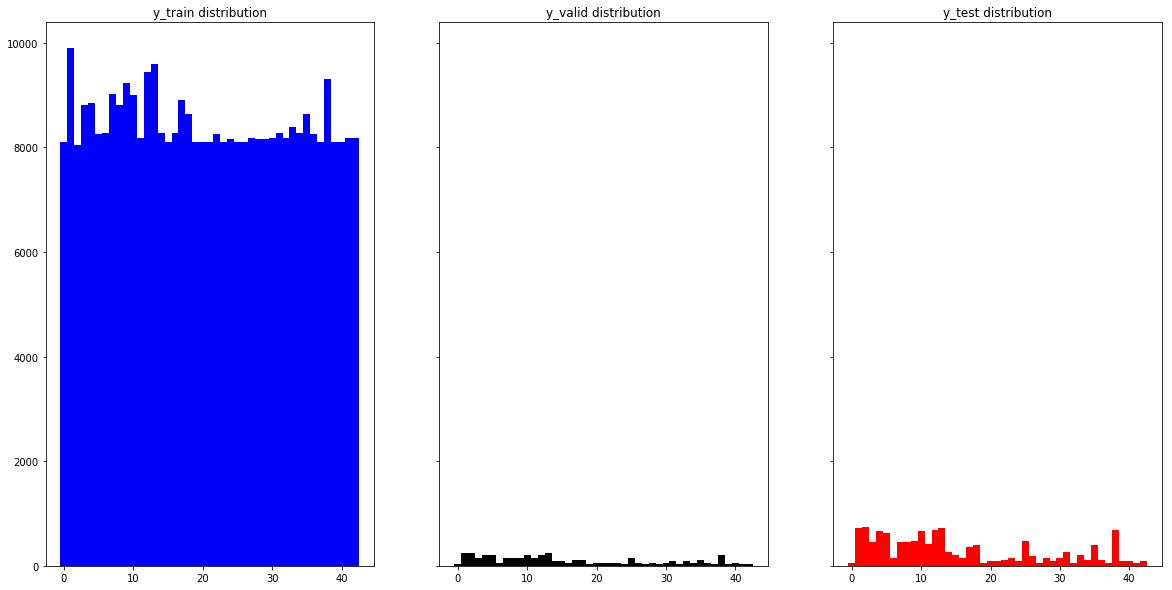

In [23]:
training_file = "train_augmented_contrast_data.p"

validation_file= "valid_trast_data.p"
test_file= "test_trast_data.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(test_file, mode='rb') as f:
    test = pickle.load(f)

    
X_valid, y_valid = valid['features'], valid['labels']
    
X_train, y_train = train['features'], train['labels']

X_test, y_test = test['features'], test['labels']

print("Total train data size: {}".format(len(y_train)))

print("Total validation data size: {}".format(len(y_valid)))

print("Total test data size: {}".format(len(y_test)))

unique, counts = np.unique(y_train, return_counts=True)
#plt.subplot(131)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,10))
axes[0].bar(unique, counts, 1, color="blue") 
axes[0].set_title('y_train distribution')


unique, counts = np.unique(y_valid, return_counts=True)
axes[1].bar(unique, counts, 1, color="black") 
axes[1].set_title('y_valid distribution')
unique, counts = np.unique(y_test, return_counts=True)
axes[2].bar(unique, counts, 1, color="red") 
axes[2].set_title('y_test distribution')
plt.show()



1
Total train data size: 327146
Total validation data size: 40760
Total test data size: 12630


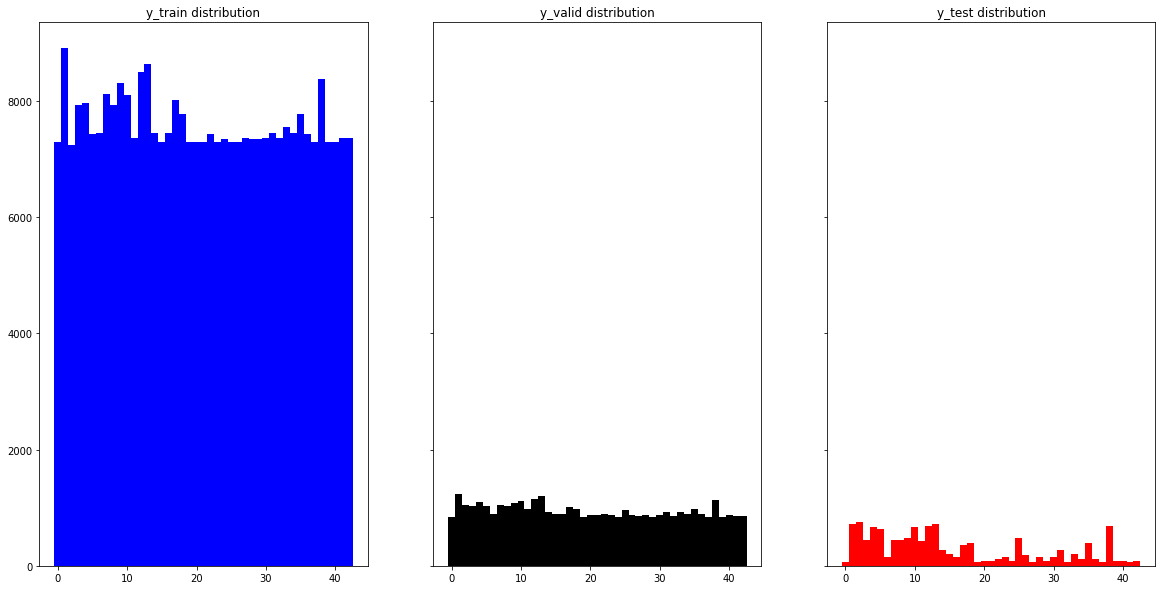

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit





X_valid2 = X_valid.copy()
y_valid2 = y_valid.copy()

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=5)
i=0
for train_index, test_index in sss.split(X_train, y_train):
    i+=1
    print(i)
    X_train, X_test2 = X_train[train_index], X_train[test_index]
    y_train, y_test2 = y_train[train_index], y_train[test_index]

    
X_valid = np.concatenate((X_valid,X_test2))
y_valid = np.concatenate((y_valid,y_test2))




del(X_test2)
del(y_test2)


print("Total train data size: {}".format(len(y_train)))

print("Total validation data size: {}".format(len(y_valid)))

print("Total test data size: {}".format(len(y_test)))

unique, counts = np.unique(y_train, return_counts=True)
#plt.subplot(131)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,10))
axes[0].bar(unique, counts, 1, color="blue") 
axes[0].set_title('y_train distribution')


unique, counts = np.unique(y_valid, return_counts=True)
axes[1].bar(unique, counts, 1, color="black") 
axes[1].set_title('y_valid distribution')
unique, counts = np.unique(y_test, return_counts=True)
axes[2].bar(unique, counts, 1, color="red") 
axes[2].set_title('y_test distribution')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle



### Model Architecture

![LeNet Architecture](lenet.png)


In [9]:

### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.utils import shuffle


from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1, padding = 'SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding= padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # Store layers weight & bias

    weights = {
        'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64),mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape=(1600, 120),mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape=(120, 84),mean = mu, stddev = sigma)),
        'wd3': tf.Variable(tf.truncated_normal(shape=(84, 43),mean = mu, stddev = sigma))}

    biases = {
        'bc1': tf.Variable(tf.zeros([16])),
        'bc2': tf.Variable(tf.zeros([64])),
        'bd1': tf.Variable(tf.zeros([120])),
        'bd2': tf.Variable(tf.zeros([84])),
        'bd3': tf.Variable(tf.zeros([43]))}
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x6.
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
    normalize = tf.divide(x,255)
    conv1 = conv2d(normalize, weights['wc1'], biases['bc1'], strides=1, padding = 'VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob1 )

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 32x32x64. Output = 16x16x64.
    pool1 = maxpool2d(conv1, k=2)

    # TODO: Layer 2: Convolutional. Output = 16x16x128.
    conv2 = conv2d(pool1, weights['wc2'], biases['bc2'], strides=1, padding = 'VALID')
    # TODO: Activation.
    conv2 = tf.nn.dropout(conv2, keep_prob2 )
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 16x16x128. Output = 8x8x128.
    pool2 = maxpool2d(conv2, k =2)

    # TODO: Flatten. Input = 8x8x128. Output =8392.
    fc1 = flatten(pool2)

    # TODO: Layer 3: Fully Connected. Input = 2048. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.dropout(fc2, keep_prob3 )
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    
    return logits


rate = 0.001
BATCH_SIZE = 128
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
keep_prob3 = tf.placeholder(tf.float32)



logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

prediction = tf.argmax(logits, 1)
real_label =  tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(prediction, real_label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    predict_all = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #batch_x = normalize_data(batch_x)
        #batch_x = contrast_all_image(batch_x)
        [predict, accuracy] = sess.run([prediction, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob1: 1,keep_prob2: 1,keep_prob3: 1 })
        total_accuracy += (accuracy * len(batch_x))
        predict_all = np.append(predict_all, predict)
    return predict_all, total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    predict_all = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        [predict, accuracy, loss] = sess.run([prediction, accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob1: 1,keep_prob2: 1,keep_prob3: 1 })
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss* len(batch_x)) 
        predict_all = np.append(predict_all, predict)
    return predict_all, total_accuracy / num_examples, total_loss / num_examples

In [26]:

### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten



rate = 0.001
BATCH_SIZE = 128
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
keep_prob3 = tf.placeholder(tf.float32)

def conv2d(x, W, b, strides=1, padding = 'SAME'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding= padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')


mu = 0
sigma = 0.1
# Store layers weight & bias

weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64),mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal(shape=(1600, 120),mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal(shape=(120, 84),mean = mu, stddev = sigma)),
    'wd3': tf.Variable(tf.truncated_normal(shape=(84, 43),mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros([16])),
    'bc2': tf.Variable(tf.zeros([64])),
    'bd1': tf.Variable(tf.zeros([120])),
    'bd2': tf.Variable(tf.zeros([84])),
    'bd3': tf.Variable(tf.zeros([43]))}
    
# TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 32x32x6.
# TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    
normalize = tf.divide(x,255)
conv1 = conv2d(normalize, weights['wc1'], biases['bc1'], strides=1, padding = 'VALID')
conv1 = tf.nn.dropout(conv1, keep_prob1 )

# TODO: Activation.
conv1 = tf.nn.relu(conv1)

# TODO: Pooling. Input = 32x32x64. Output = 16x16x64.
pool1 = maxpool2d(conv1, k=2)

# TODO: Layer 2: Convolutional. Output = 16x16x128.
conv2 = conv2d(pool1, weights['wc2'], biases['bc2'], strides=1, padding = 'VALID')
# TODO: Activation.
conv2 = tf.nn.dropout(conv2, keep_prob2 )
conv2 = tf.nn.relu(conv2)

# TODO: Pooling. Input = 16x16x128. Output = 8x8x128.
pool2 = maxpool2d(conv2, k =2)

# TODO: Flatten. Input = 8x8x128. Output =8392.
fc1 = flatten(pool2)

# TODO: Layer 3: Fully Connected. Input = 2048. Output = 120.
fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    
    
# TODO: Activation.
fc1 = tf.nn.relu(fc1)

# TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
fc2 = tf.nn.dropout(fc2, keep_prob3 )
# TODO: Activation.
fc2 = tf.nn.relu(fc2)

# TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
logits = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

prediction = tf.argmax(logits, 1)
real_label =  tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(prediction, real_label)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    predict_all = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #batch_x = normalize_data(batch_x)
        #batch_x = contrast_all_image(batch_x)
        [predict, accuracy] = sess.run([prediction, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob1: 1,keep_prob2: 1,keep_prob3: 1 })
        total_accuracy += (accuracy * len(batch_x))
        predict_all = np.append(predict_all, predict)
    return predict_all, total_accuracy / num_examples

def evaluate_loss(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    predict_all = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        [predict, accuracy, loss] = sess.run([prediction, accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob1: 1,keep_prob2: 1,keep_prob3: 1 })
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss* len(batch_x)) 
        predict_all = np.append(predict_all, predict)
    return predict_all, total_accuracy / num_examples, total_loss / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training...

65443
EPOCH 1 ...
time spent on training 17.202102604000174 s
Train Accuracy = 0.429
Validation Accuracy = 0.432
Validation Accuracy2 = 0.527

65433
EPOCH 2 ...
time spent on training 16.64845890200013 s
Train Accuracy = 0.628
Validation Accuracy = 0.627
Validation Accuracy2 = 0.709

65426
EPOCH 3 ...
time spent on training 16.63537805399983 s
Train Accuracy = 0.740
Validation Accuracy = 0.736
Validation Accuracy2 = 0.792

65424
EPOCH 4 ...
time spent on training 16.704872179000176 s
Train Accuracy = 0.800
Validation Accuracy = 0.790
Validation Accuracy2 = 0.822

65420
EPOCH 5 ...
time spent on training 16.941899463000027 s
Train Accuracy = 0.824
Validation Accuracy = 0.817
Validation Accuracy2 = 0.870

65443
EPOCH 6 ...
time spent on training 17.184946281000066 s
Train Accuracy = 0.872
Validation Accuracy = 0.865
Validation Accuracy2 = 0.899

65433
EPOCH 7 ...
time spent on training 16.944299611000133 s
Train Accuracy = 0.899
Validation Accuracy = 0.890
Validation Accurac

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


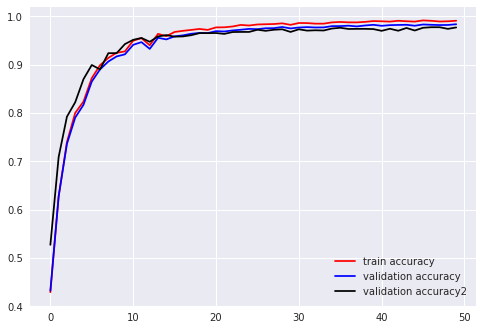

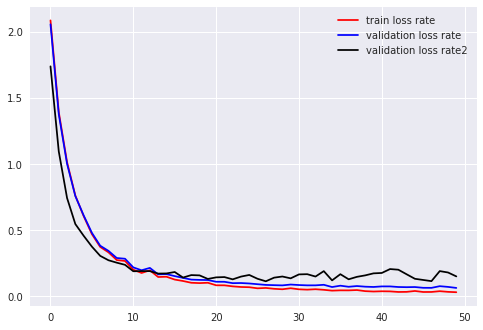

Model saved


In [52]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from timeit import default_timer as timer
train_rate = []
train_loss_rate = []
valid_rate = []
valid_loss_rate = []
valid_rate2 = []
valid_loss_rate2 = []
EPOCHS = 50
rate = 0.001
savefile = './model2.ckpt'
#skf = StratifiedKFold(n_splits=10,random_state =5)
#X_train = np.array(X_train)
#y_train = np.array(y_train)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    
    print("Training...")
    print()
    for i in range(EPOCHS):
        start = timer()
        if i%5 == 0:
            skf = StratifiedKFold(n_splits=5,random_state =EPOCHS)
            g = skf.split(*(shuffle(X_train, y_train)))
        ind1, ind2 = next(g)
        print(len(ind2))
        #X_train, y_train = shuffle(X_train2, y_train)
        X_train_temp, y_train_temp = X_train[ind2], y_train[ind2]
        num_examples = len(X_train_temp)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_temp[offset:end], y_train_temp[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.8,keep_prob2: 0.7, keep_prob3: 0.3})
        
        train_predict, train_accuracy, train_loss = evaluate_loss(X_train_temp, y_train_temp)
        train_rate.append(train_accuracy)
        train_loss_rate.append(train_loss)
        valid_predict, validation_accuracy, valid_loss = evaluate_loss(X_valid, y_valid)
        valid_rate.append(validation_accuracy)
        valid_loss_rate.append(valid_loss)
        valid_predict2, validation_accuracy2, valid_loss2 = evaluate_loss(X_valid2, y_valid2)
        valid_rate2.append(validation_accuracy2)
        valid_loss_rate2.append(valid_loss2)
        print("EPOCH {} ...".format(i+1))
        print("time spent on training {} s".format(timer()-start))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Accuracy2 = {:.3f}".format(validation_accuracy2))
        print()
        
    plt.figure()
    plt.plot(range(EPOCHS), train_rate, 'r', label = 'train accuracy')
    plt.plot(range(EPOCHS), valid_rate, 'b', label = 'validation accuracy')
    plt.plot(range(EPOCHS), valid_rate2, 'k', label = 'validation accuracy2')
    plt.legend(shadow=True)    
    plt.show()
    
    plt.figure()
    plt.plot(range(EPOCHS), train_loss_rate, 'r', label = 'train loss rate')
    plt.plot(range(EPOCHS), valid_loss_rate, 'b', label = 'validation loss rate')
    plt.plot(range(EPOCHS), valid_loss_rate2, 'k', label = 'validation loss rate2')
    plt.legend(shadow=True)
    plt.show()
    
    saver.save(sess, savefile)
    print("Model saved")

Training...

65443
EPOCH 1 ...
time spent on training 17.18876778699996 s
Train Accuracy = 0.993
Validation Accuracy = 0.984
Validation Accuracy2 = 0.976

65433
EPOCH 2 ...
time spent on training 16.62249551199966 s
Train Accuracy = 0.992
Validation Accuracy = 0.984
Validation Accuracy2 = 0.978

65426
EPOCH 3 ...
time spent on training 16.62704032900001 s
Train Accuracy = 0.992
Validation Accuracy = 0.983
Validation Accuracy2 = 0.971

65424
EPOCH 4 ...
time spent on training 16.616688601000533 s
Train Accuracy = 0.991
Validation Accuracy = 0.982
Validation Accuracy2 = 0.975

65420
EPOCH 5 ...
time spent on training 16.653798708999602 s
Train Accuracy = 0.992
Validation Accuracy = 0.984
Validation Accuracy2 = 0.980

65443
EPOCH 6 ...
time spent on training 17.16506720899997 s
Train Accuracy = 0.993
Validation Accuracy = 0.984
Validation Accuracy2 = 0.975

65433
EPOCH 7 ...
time spent on training 16.610494745000324 s
Train Accuracy = 0.992
Validation Accuracy = 0.984
Validation Accuracy2

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


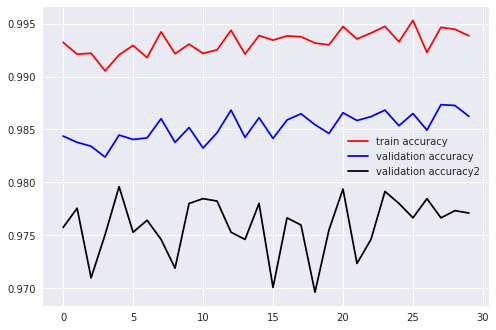

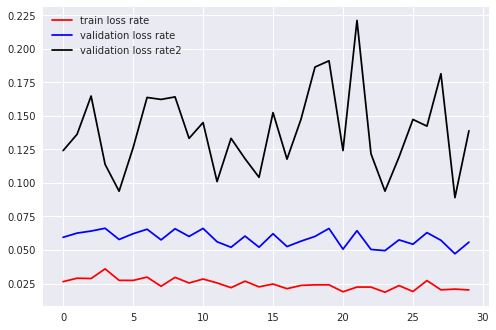

Model saved


In [54]:
train_rate = []
train_loss_rate = []
valid_rate = []
valid_loss_rate = []
valid_rate2 = []
valid_loss_rate2 = []
EPOCHS = 30
rate = 0.001
savefile = './model2.ckpt'
#skf = StratifiedKFold(n_splits=10,random_state =5)
#X_train = np.array(X_train)
#y_train = np.array(y_train)
with tf.Session() as sess:
    saver.restore(sess, savefile)
    #saver.restore(sess, savefile)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        start = timer()
        if i%5 == 0:
            skf = StratifiedKFold(n_splits=5,random_state =EPOCHS)
            g = skf.split(*(shuffle(X_train, y_train)))
        ind1, ind2 = next(g)
        print(len(ind2))
        #X_train, y_train = shuffle(X_train2, y_train)
        X_train_temp, y_train_temp = X_train[ind2], y_train[ind2]
        num_examples = len(X_train_temp)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_temp[offset:end], y_train_temp[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.8,keep_prob2: 0.7, keep_prob3: 0.3})
        
        train_predict, train_accuracy, train_loss = evaluate_loss(X_train_temp, y_train_temp)
        train_rate.append(train_accuracy)
        train_loss_rate.append(train_loss)
        valid_predict, validation_accuracy, valid_loss = evaluate_loss(X_valid, y_valid)
        valid_rate.append(validation_accuracy)
        valid_loss_rate.append(valid_loss)
        valid_predict2, validation_accuracy2, valid_loss2 = evaluate_loss(X_valid2, y_valid2)
        valid_rate2.append(validation_accuracy2)
        valid_loss_rate2.append(valid_loss2)
        print("EPOCH {} ...".format(i+1))
        print("time spent on training {} s".format(timer()-start))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Accuracy2 = {:.3f}".format(validation_accuracy2))
        print()
        
    plt.figure()
    plt.plot(range(EPOCHS), train_rate, 'r', label = 'train accuracy')
    plt.plot(range(EPOCHS), valid_rate, 'b', label = 'validation accuracy')
    plt.plot(range(EPOCHS), valid_rate2, 'k', label = 'validation accuracy2')
    plt.legend(shadow=True)    
    plt.show()
    
    plt.figure()
    plt.plot(range(EPOCHS), train_loss_rate, 'r', label = 'train loss rate')
    plt.plot(range(EPOCHS), valid_loss_rate, 'b', label = 'validation loss rate')
    plt.plot(range(EPOCHS), valid_loss_rate2, 'k', label = 'validation loss rate2')
    plt.legend(shadow=True)
    plt.show()
    
    saver.save(sess, savefile)
    print("Model saved")

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


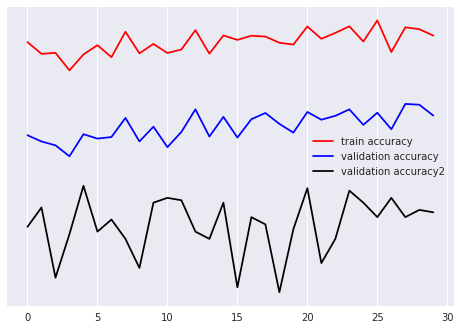

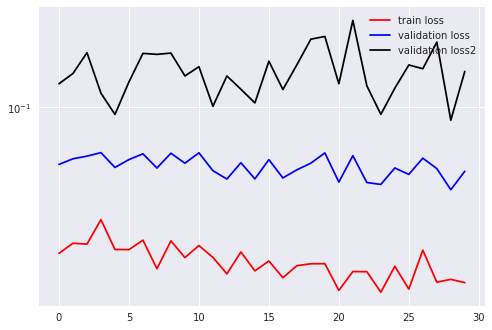

In [55]:
    plt.figure()
    plt.semilogy(range(EPOCHS), train_rate, 'r', label = 'train accuracy')
    plt.semilogy(range(EPOCHS), valid_rate, 'b', label = 'validation accuracy')
    plt.semilogy(range(EPOCHS), valid_rate2, 'k', label = 'validation accuracy2')
    plt.legend(shadow=True)
    plt.show()
    plt.figure()
    plt.semilogy(range(EPOCHS), train_loss_rate, 'r', label = 'train loss')
    plt.semilogy(range(EPOCHS), valid_loss_rate, 'b', label = 'validation loss')
    plt.semilogy(range(EPOCHS), valid_loss_rate2, 'k', label = 'validation loss2')
    plt.legend(shadow=True)
    plt.show()

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


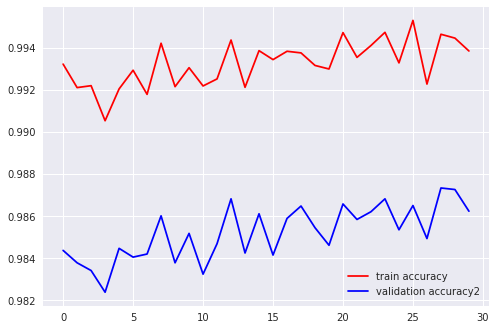

[ 0.96774194  0.98097252  0.97352342  0.99337748  0.9976247   0.97663551
  1.          1.          0.96551724  1.          1.          0.99003322
  1.          1.          1.          1.          0.72340426  1.
  0.99166667  1.          0.97435897  0.89090909  1.          0.95934959
  1.          0.98013245  0.99173554  0.98360656  0.99173554  1.          0.96
  0.99447514  0.96774194  1.          0.83495146  0.9958159   0.99173554
  1.          0.94808126  1.          0.85714286  0.65882353  0.98305085]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[7290 8910 7236 7938 7965 7425 7452 8127 7938 8316 8100 7371 8505 8640 7452
 7290 7452 8019 7776 7290 7290 7290 7425 7290 7344 7290 7290 7371 7344 7344
 7371 7452 7371 7547 7452 7776 7425 7290 8370 7290 7290 7371 7371]



/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


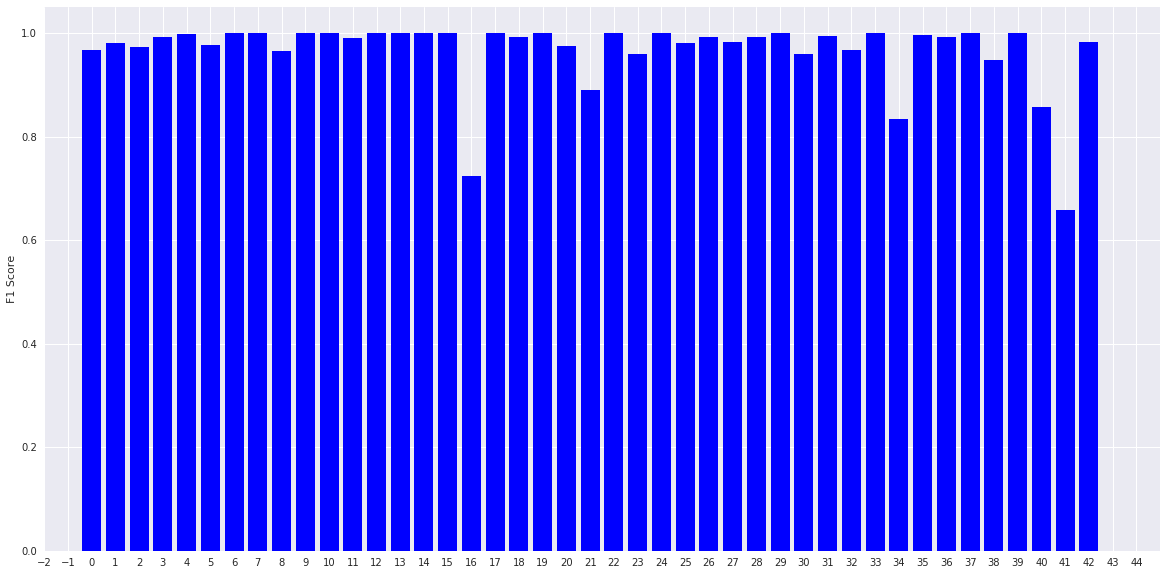

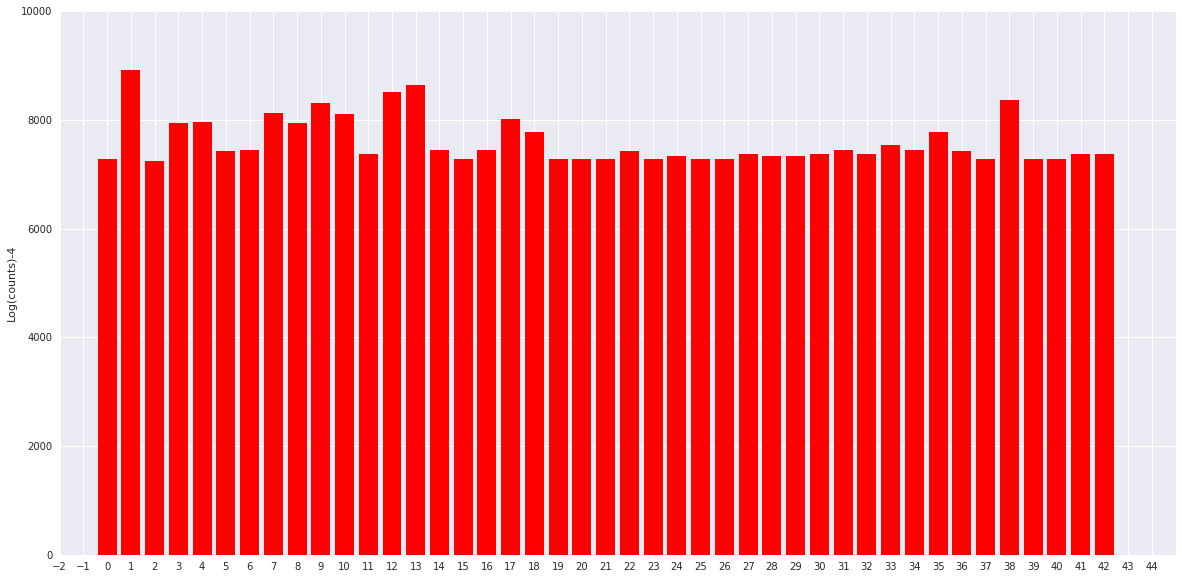

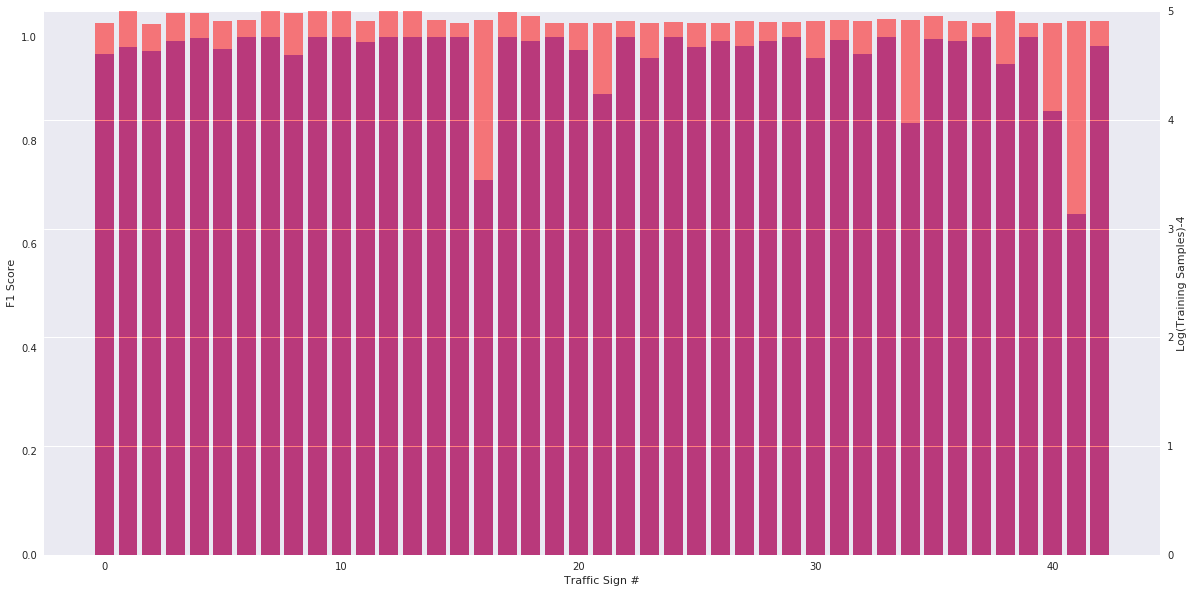

In [56]:
    import seaborn as sn
    from sklearn.metrics import confusion_matrix, classification_report, f1_score
    import pandas as pd
    plt.figure()
    plt.plot(range(EPOCHS), train_rate, 'r', label = 'train accuracy')
    plt.plot(range(EPOCHS), valid_rate, 'b', label = 'validation accuracy2')
    plt.legend(shadow=True)
    plt.show()
    #print(classification_report(y_valid, valid_predict))
    array = confusion_matrix(y_valid2, valid_predict2)
    score = f1_score(y_valid2, valid_predict2, average = None)
    print(score)
    unique, counts = np.unique(y_train, return_counts=True)
    print(unique)
    print(counts)
    print()
    plt.figure(figsize = (20,10))
    
    #plt.plot(unique, np.log(counts)-4, 'r', label = 'counts')
    #plt.plot(unique, score, 'b', label = 'score')
    plt.bar(unique, score, width=0.8, color='b')
    plt.axis([-2, 45, 0, 1.05])
    plt.xticks(np.arange(-2, 45, 1))
    plt.ylabel('F1 Score')
    fig.suptitle('Score vs. Sign #', fontsize=20)
    plt.legend(shadow=True)
    plt.show()
    print()
    plt.figure(figsize = (20,10))
    fig.suptitle('Log(counts)-4 vs. Sign #', fontsize=20)
    plt.bar(unique, counts, width=0.8, color='r')
    plt.axis([-2, 45, 0, 10000])
    plt.xticks(np.arange(-2, 45, 1))
    plt.ylabel('Log(counts)-4')
    #plt.plot(np.log(counts)-4, score ,'b.', label = 'score vs counts')
 
    plt.legend(shadow=True)
    plt.show()
    #df_cm = pd.DataFrame(array, index = range(43), columns = range(43))
    #plt.figure(figsize = (30,25))
    #sn.heatmap(df_cm, annot=True)
    fig = plt.figure(figsize = (20,10))
    plt.grid(False)
    ax = fig.add_subplot(111)
    ax.bar(unique, score, width=0.8, color='b', alpha=0.5)

    ax2 = ax.twinx()
    ax2.bar(unique, np.log(counts)-4, width=0.8, color='r', alpha=0.5)

    ax.set_xlabel("Traffic Sign #")
    ax.set_ylabel("F1 Score")
    ax2.set_ylabel("Log(Training Samples)-4")
    ax2.set_ylim(0, 5)
    ax.set_ylim(0,1.05)
    plt.show()

41


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


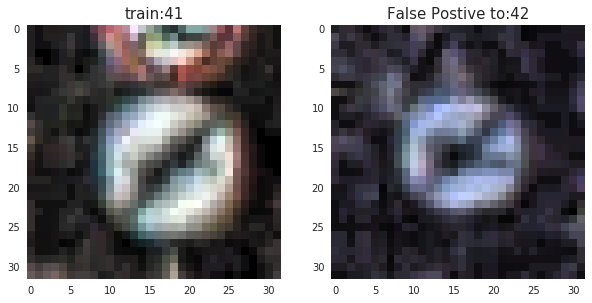

41


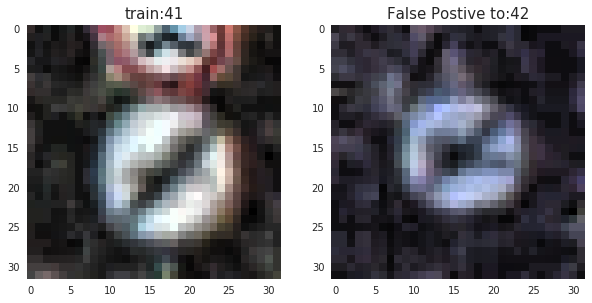

41


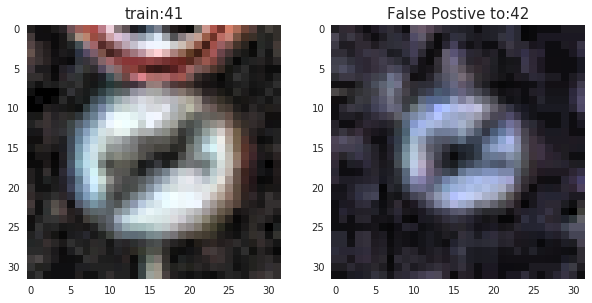

26


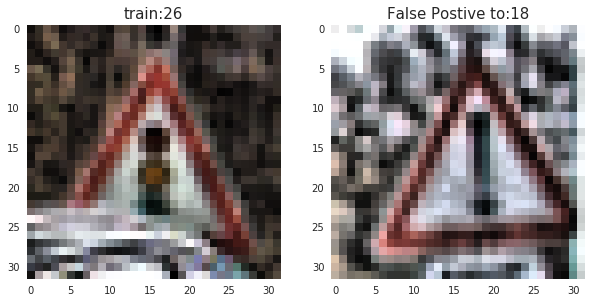

1


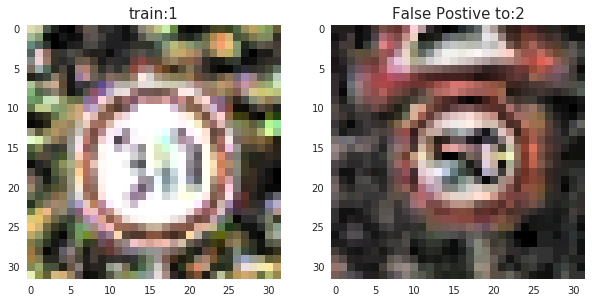

1


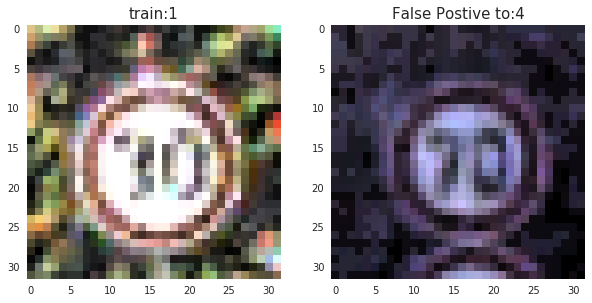

1


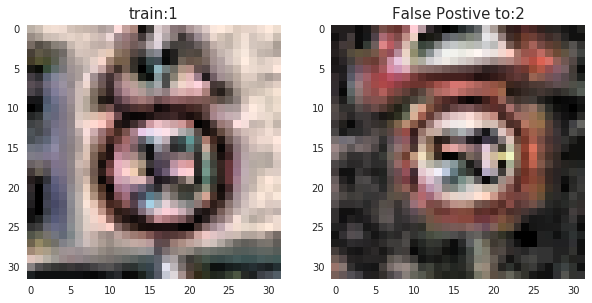

1


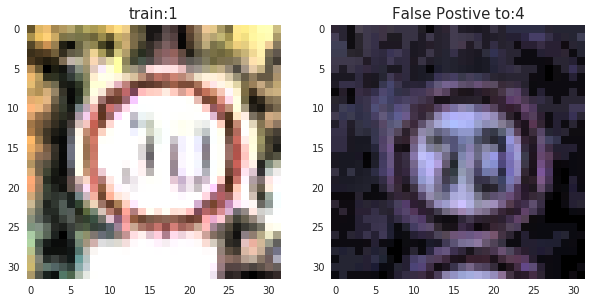

1


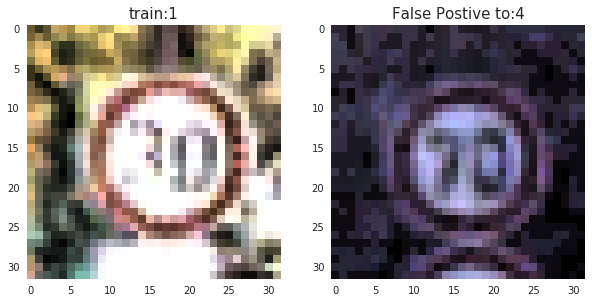

1


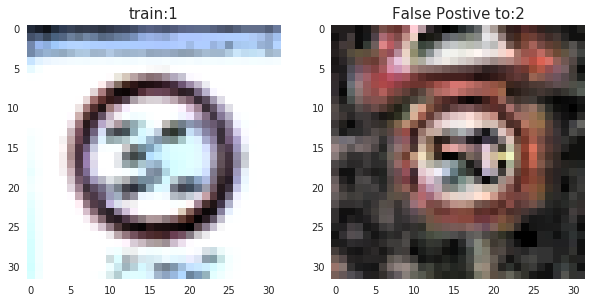

40


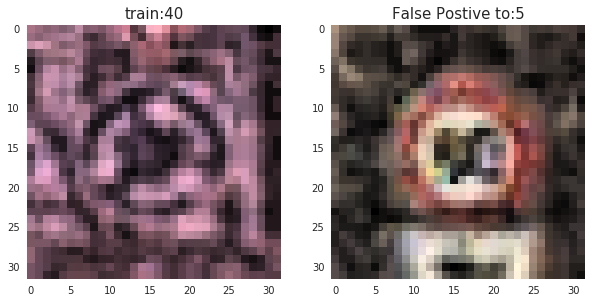

40


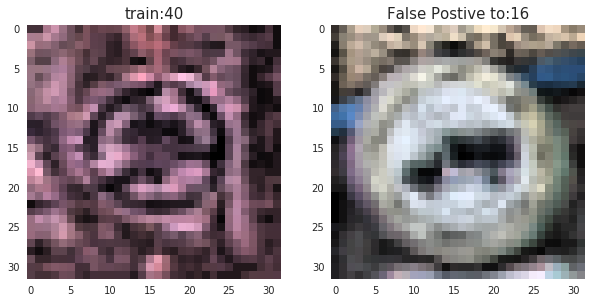

40


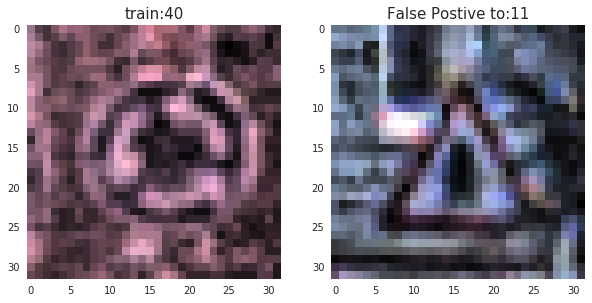

16


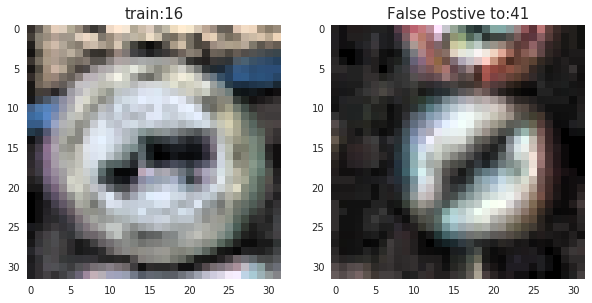

16


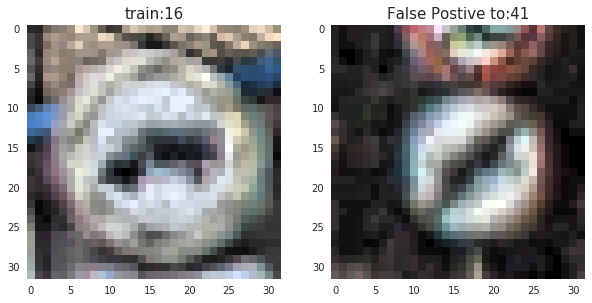

16


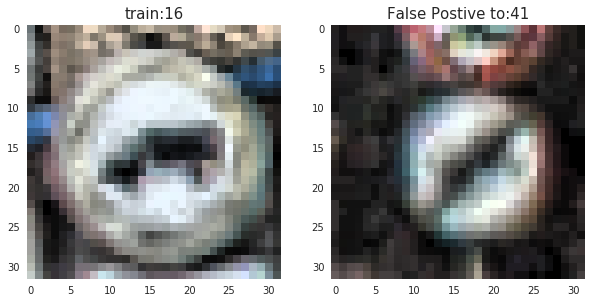

16


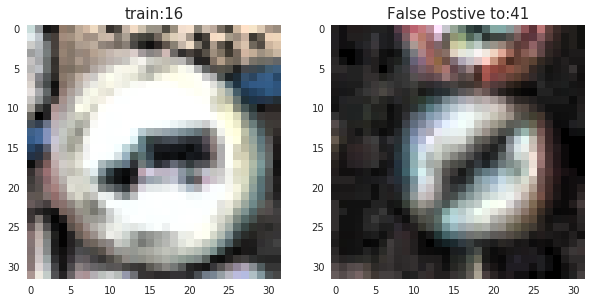

16


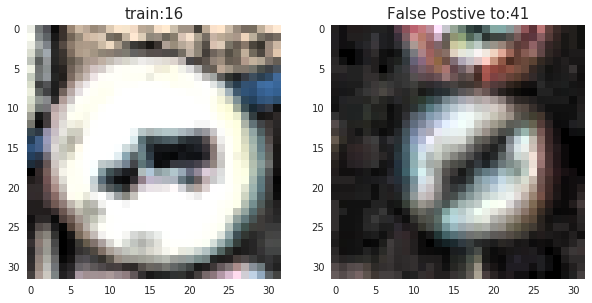

16


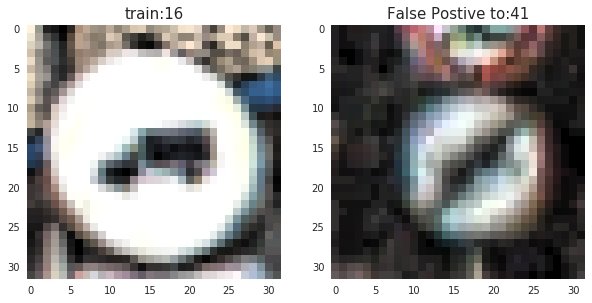

16


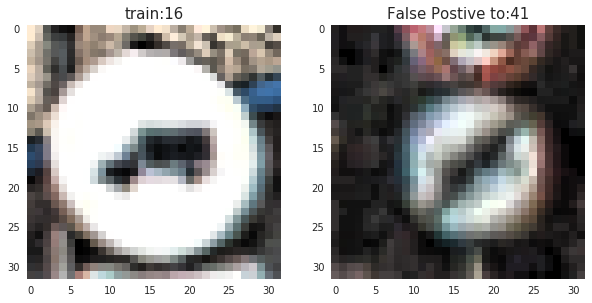

16


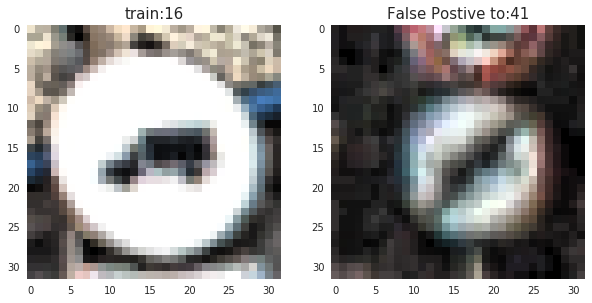

16


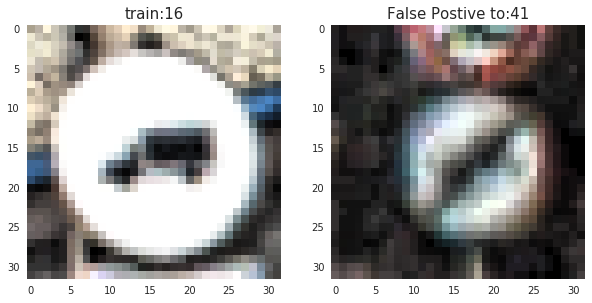

16


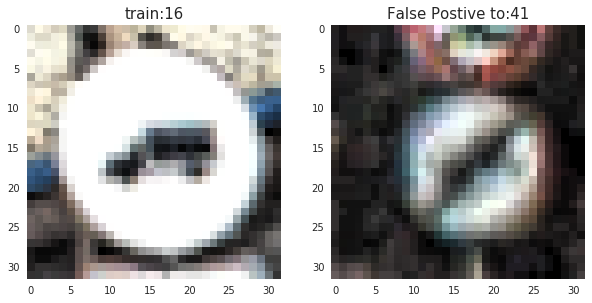

16


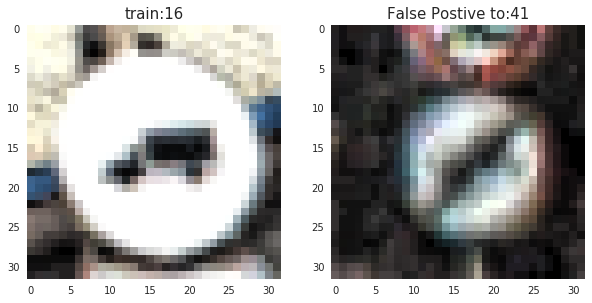

16


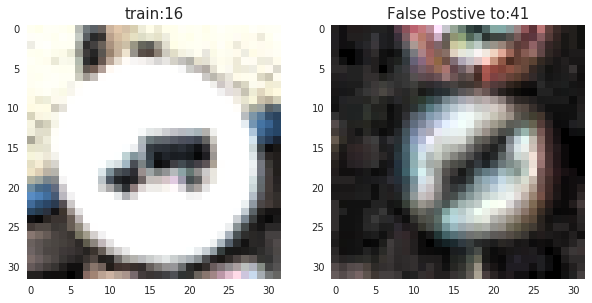

16


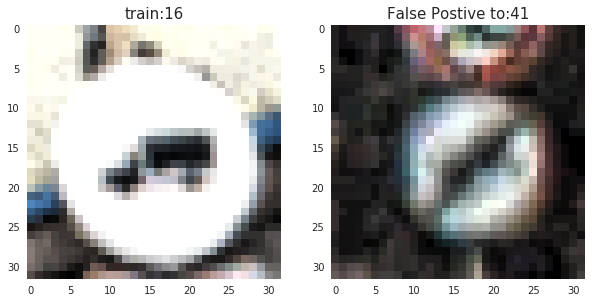

16


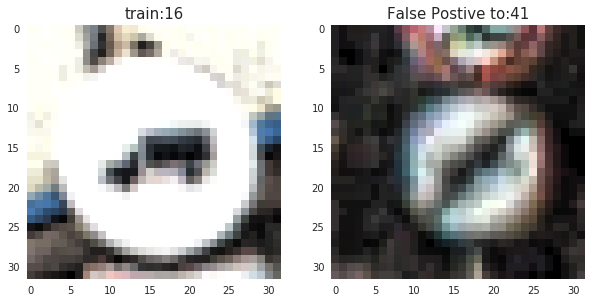

16


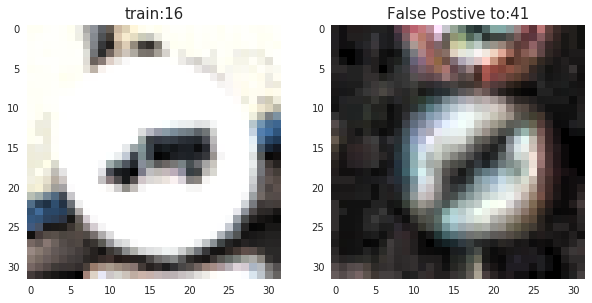

16


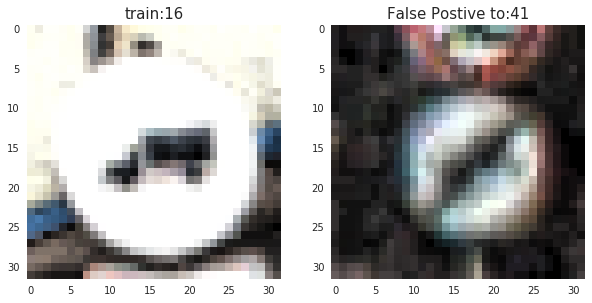

16


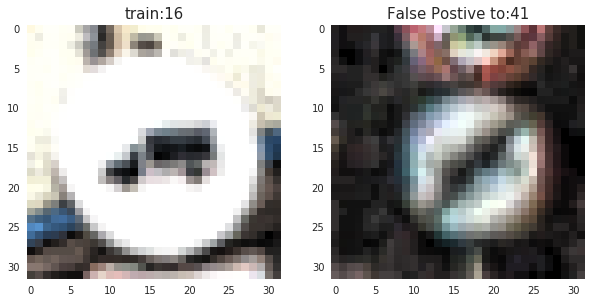

16


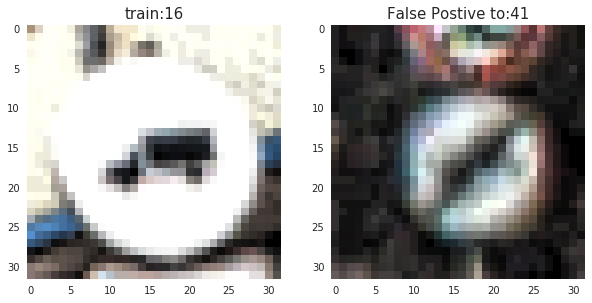

16


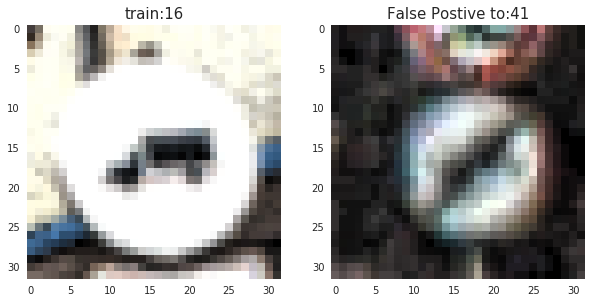

16


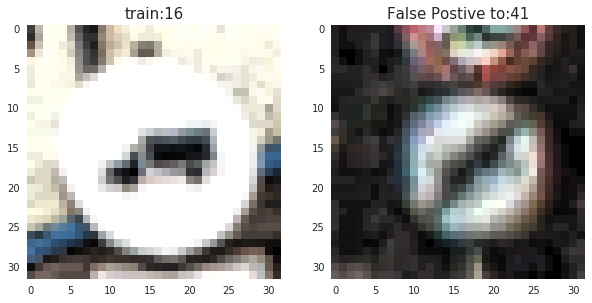

16


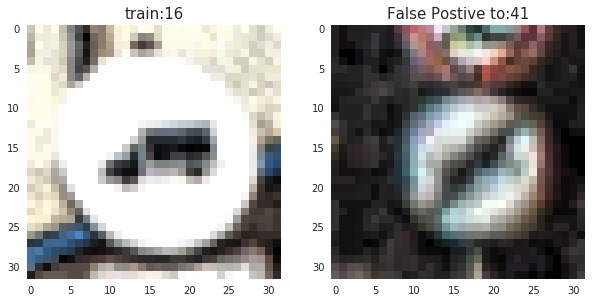

16


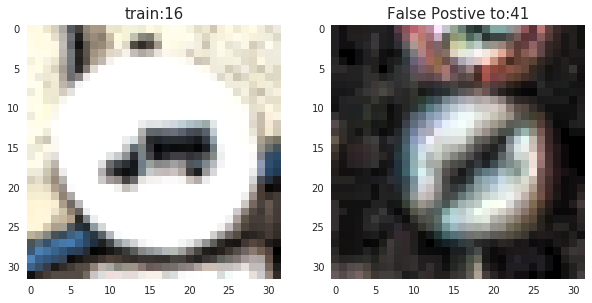

16


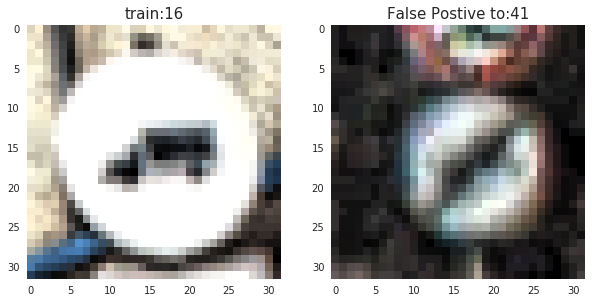

16


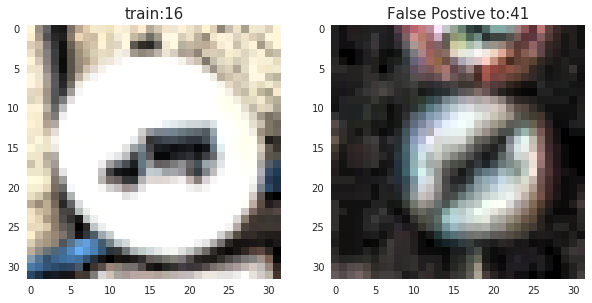

16


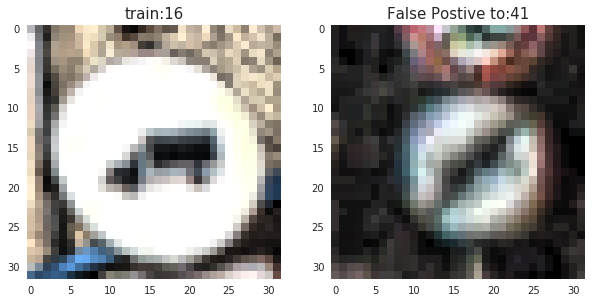

16


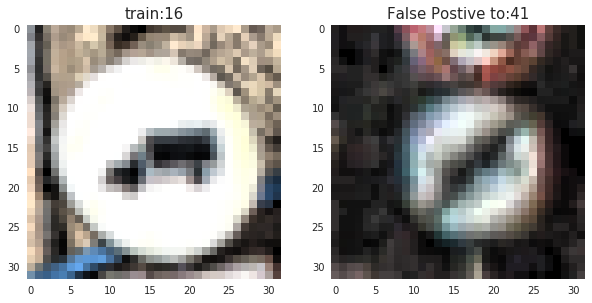

16


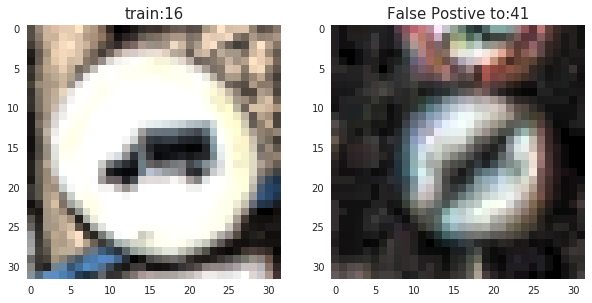

16


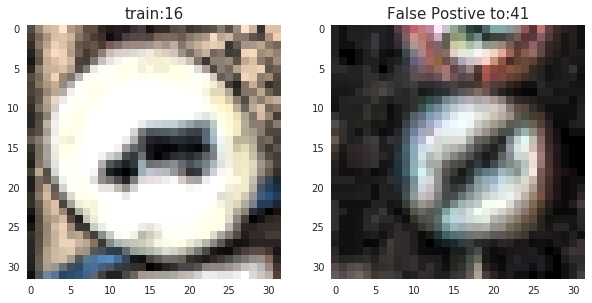

16


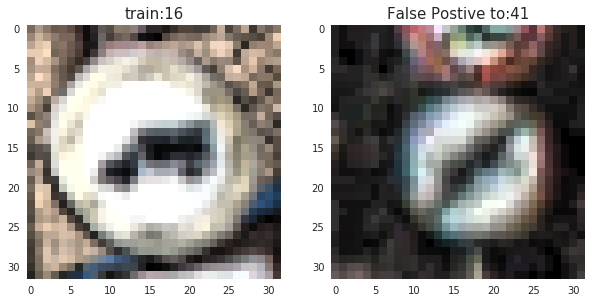

16


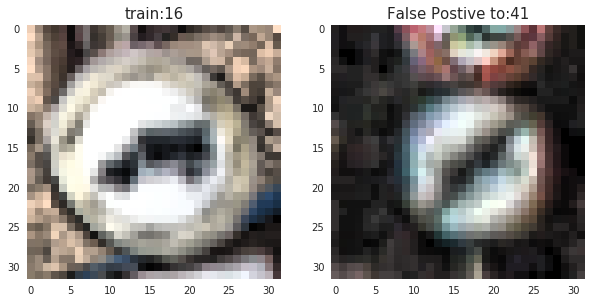

3


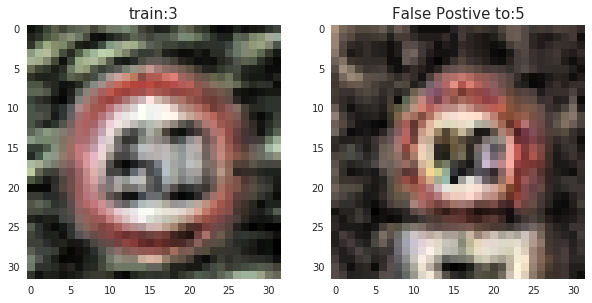

3


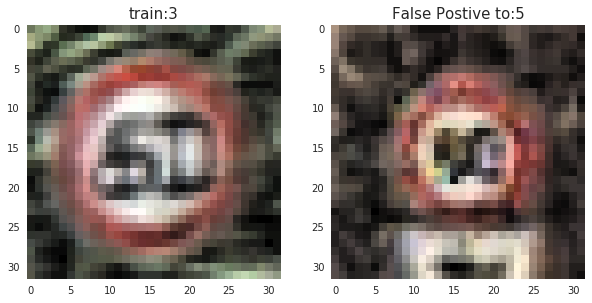

3


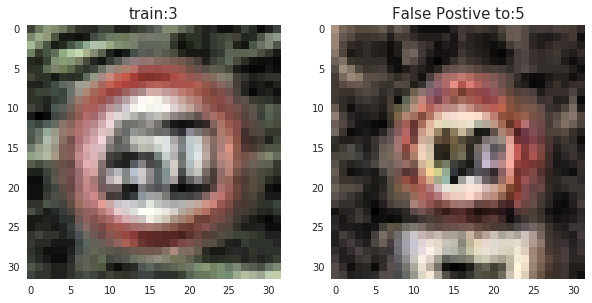

3


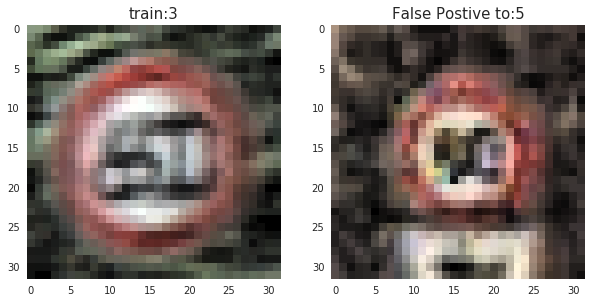

3


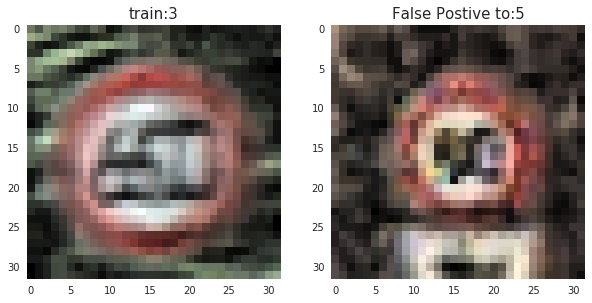

3


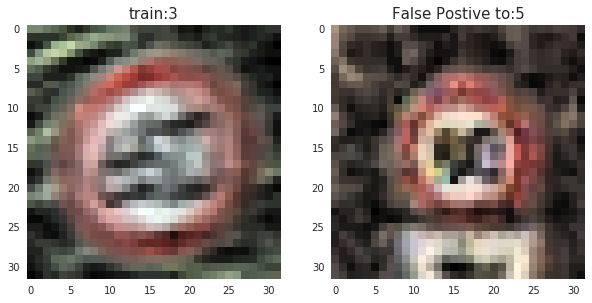

3


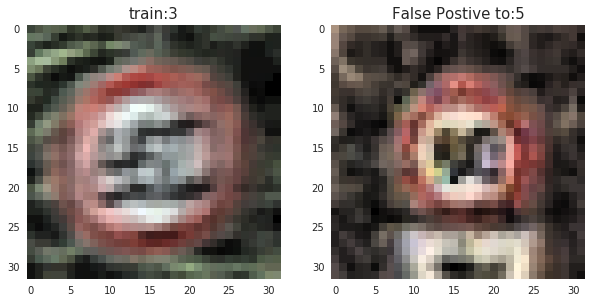

29


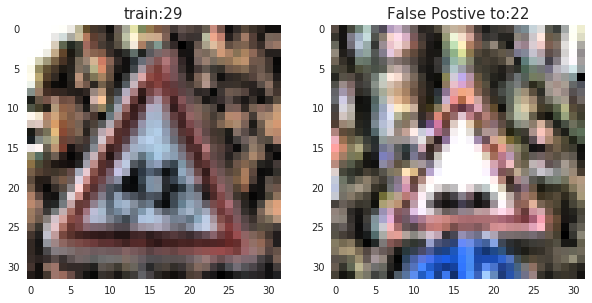

29


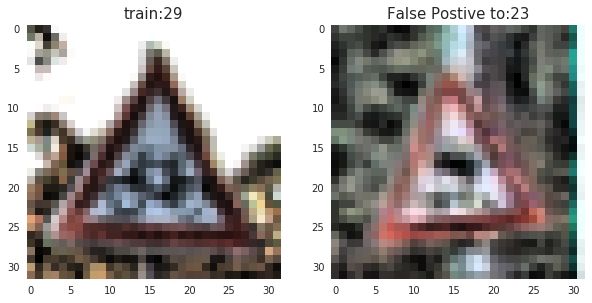

24


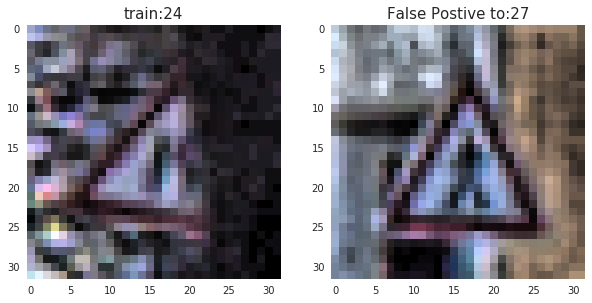

5


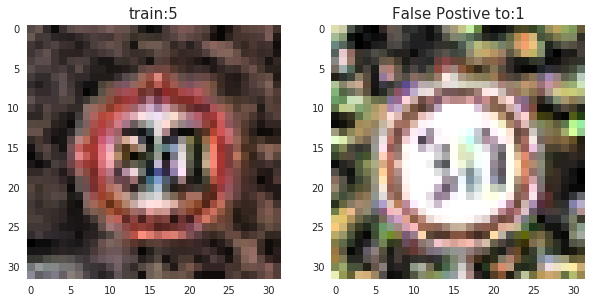

5


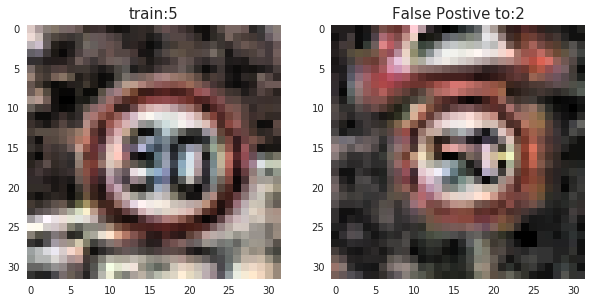

5


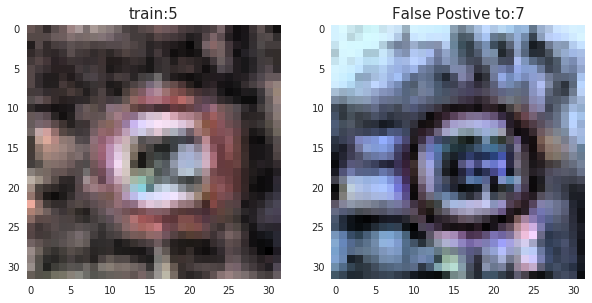

5


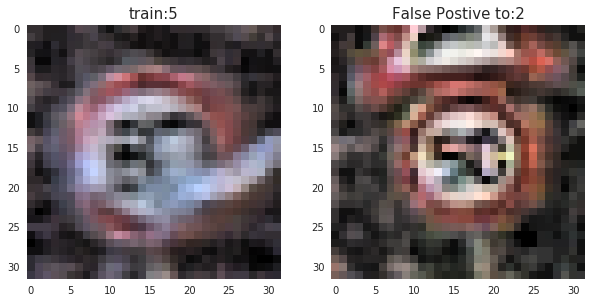

5


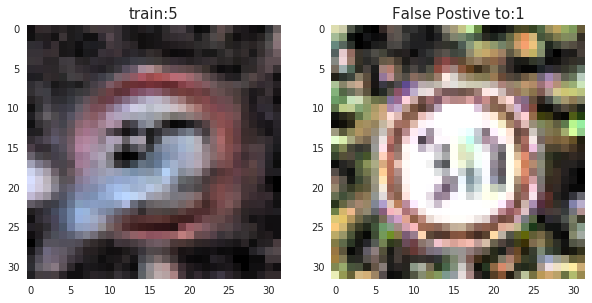

8


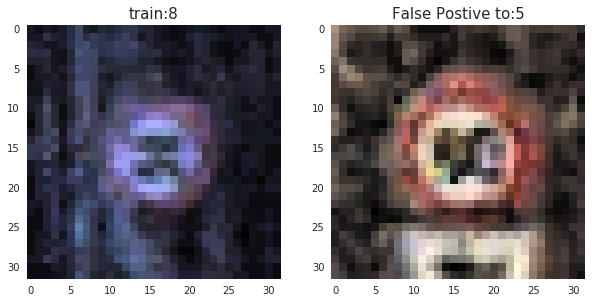

8


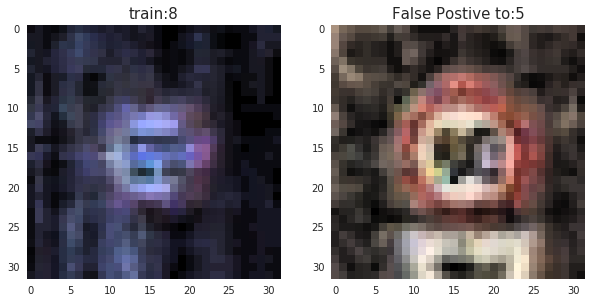

8


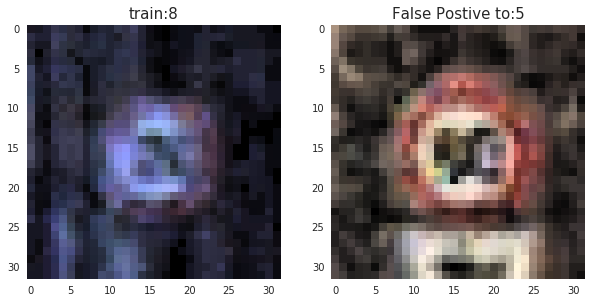

8


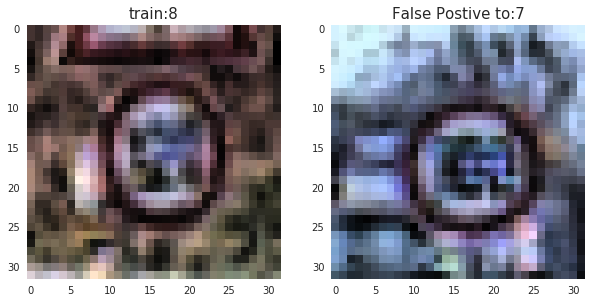

8


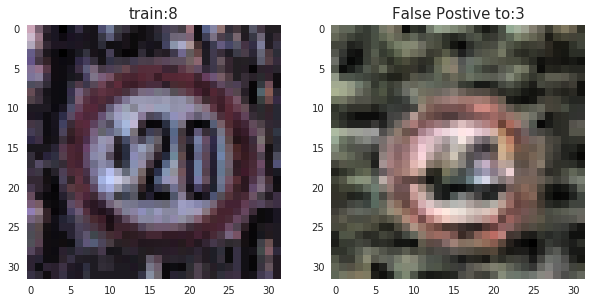

35


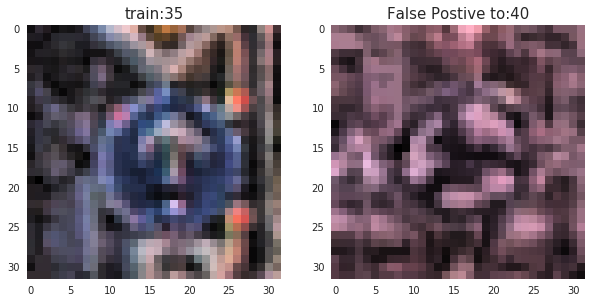

34


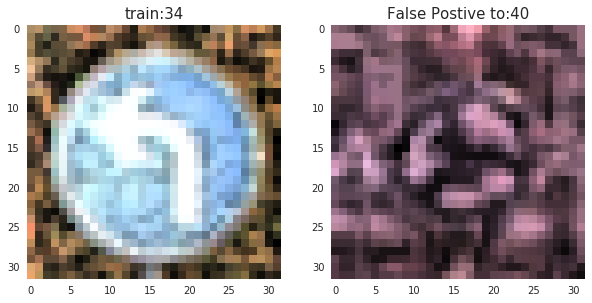

34


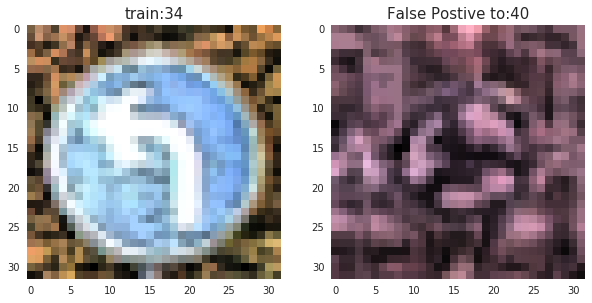

34


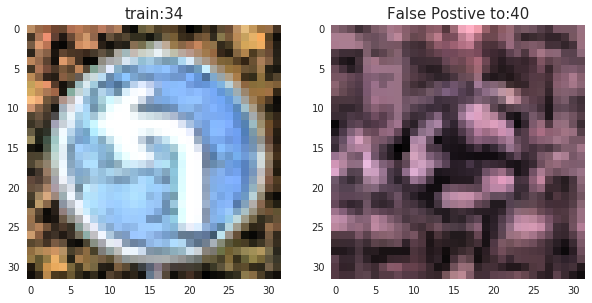

34


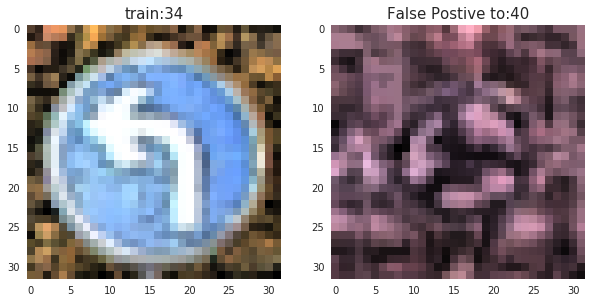

18


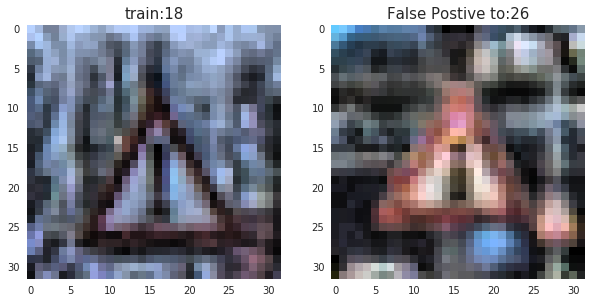

13


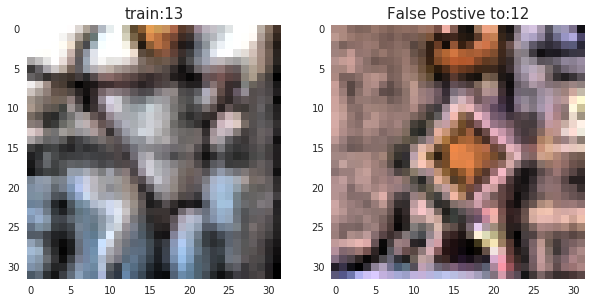

7


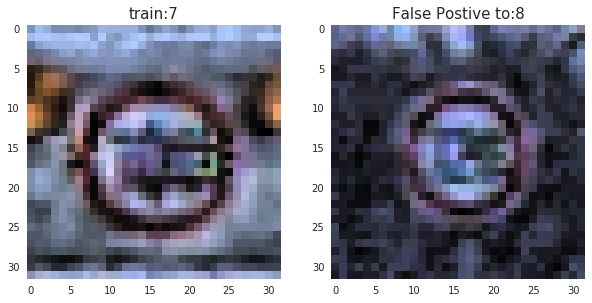

30


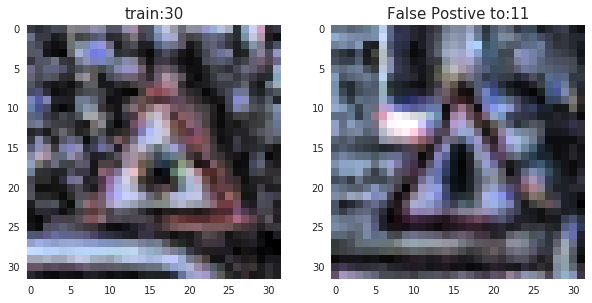

30


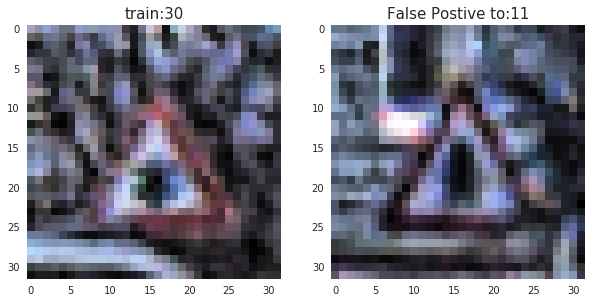

30


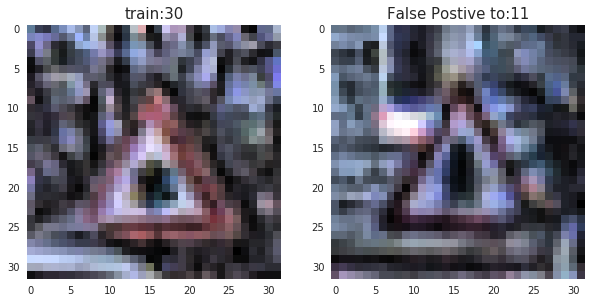

30


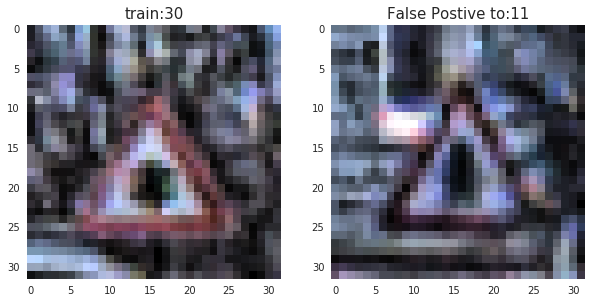

30


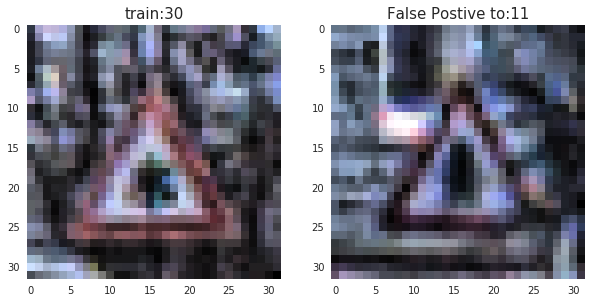

30


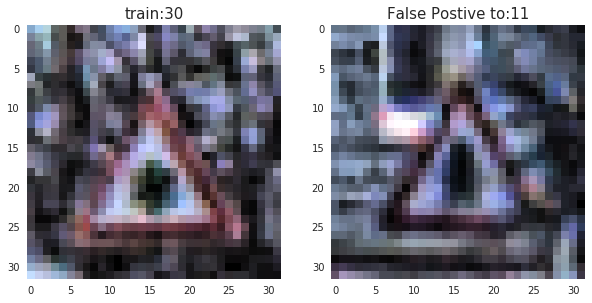

30


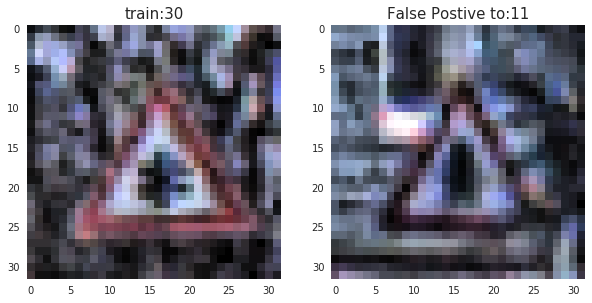

30


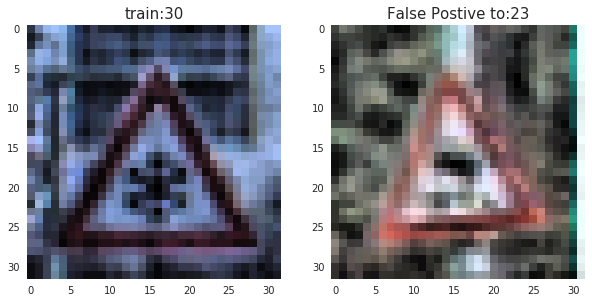

30


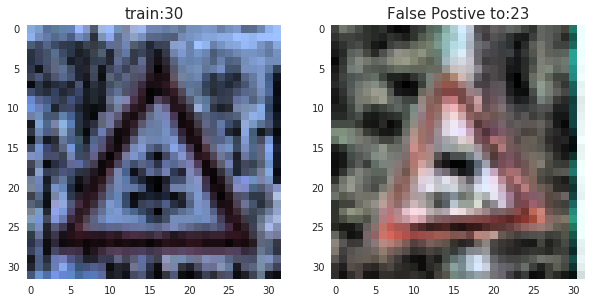

21


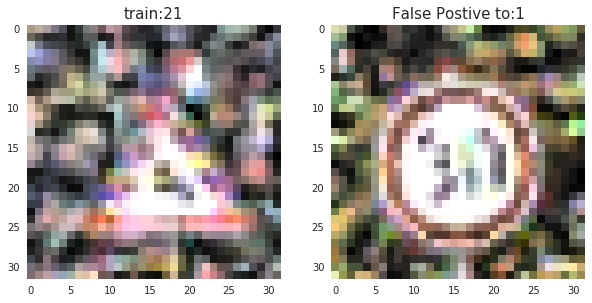

21


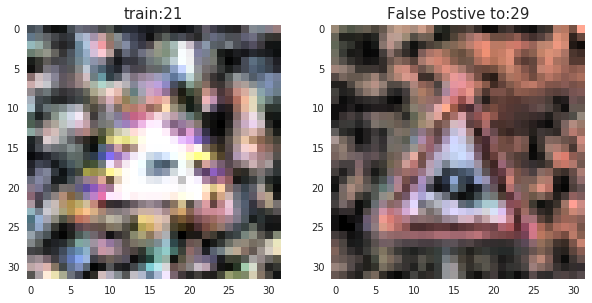

21


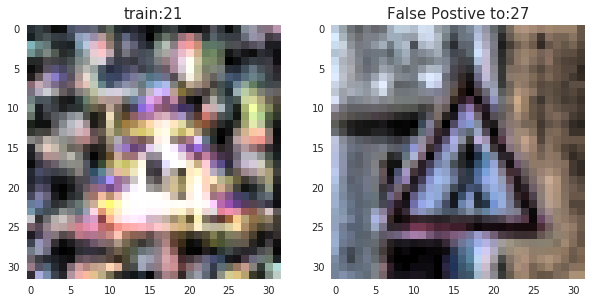

21


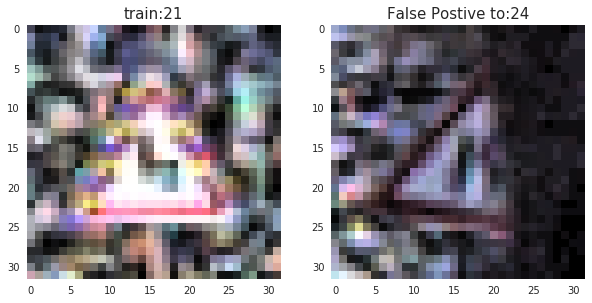

21


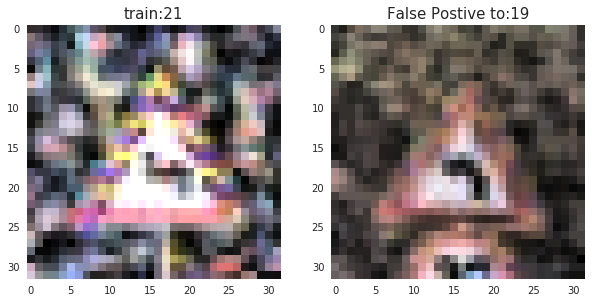

21


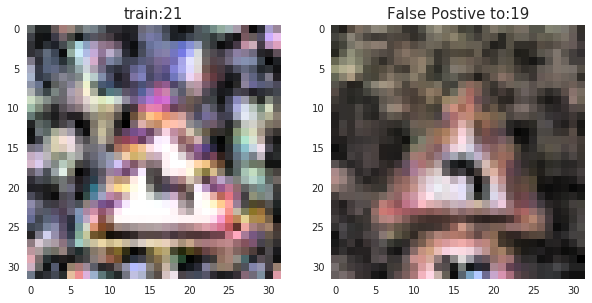

21


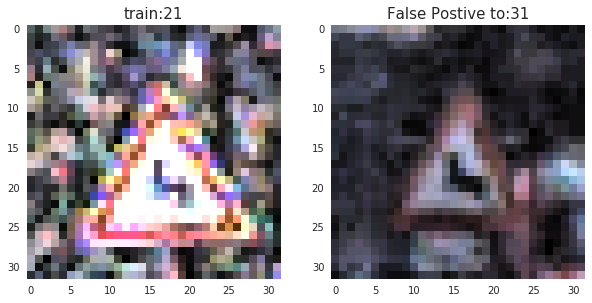

20


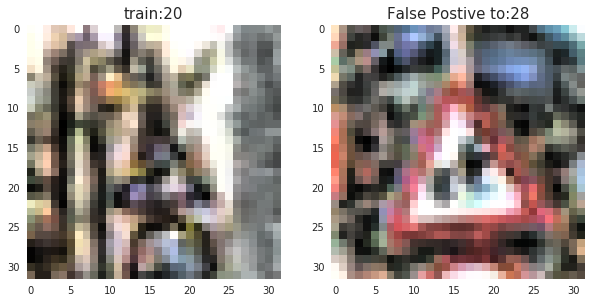

20


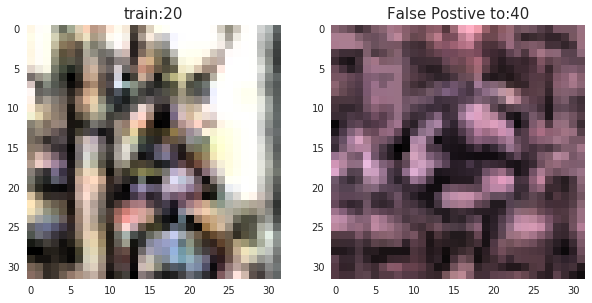

20


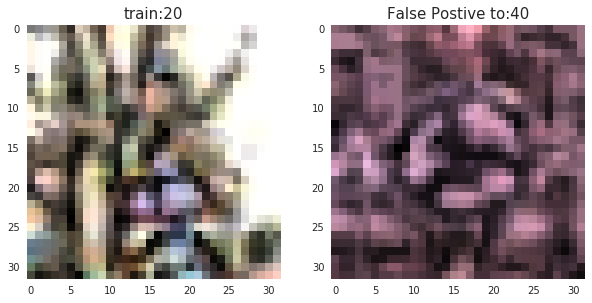

20


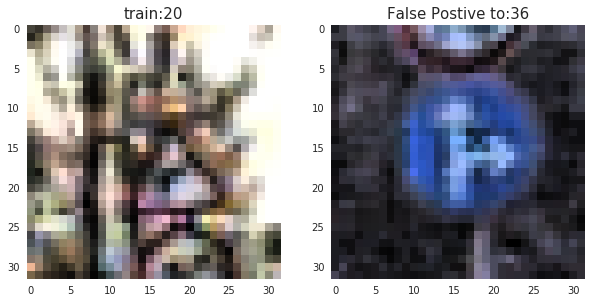

33


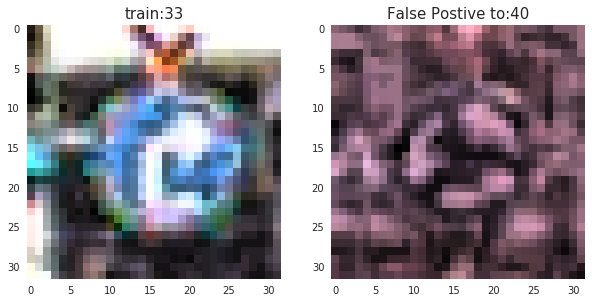

33


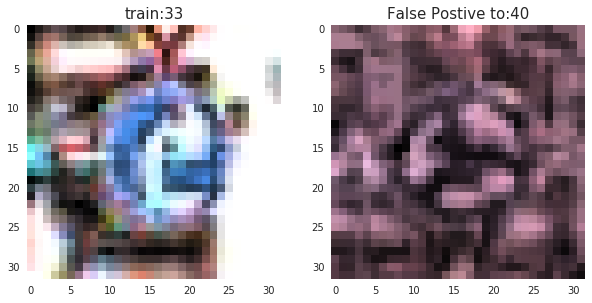

28


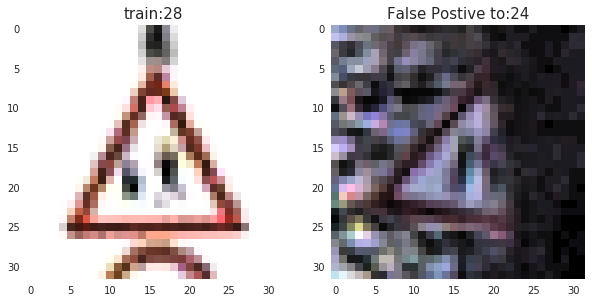

17


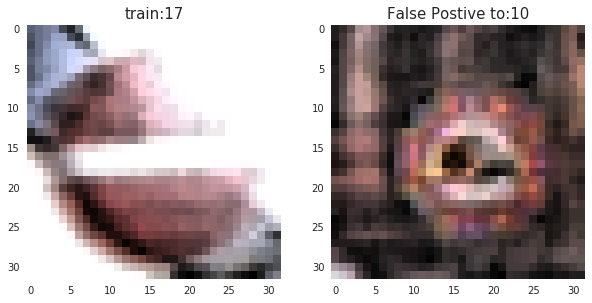

2


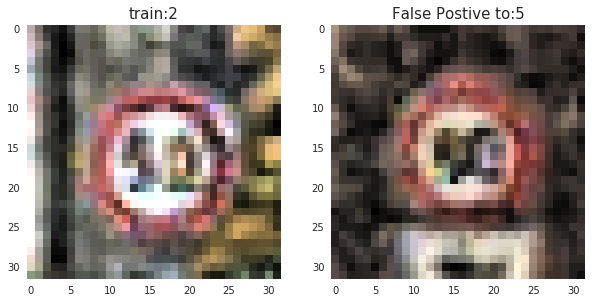

2


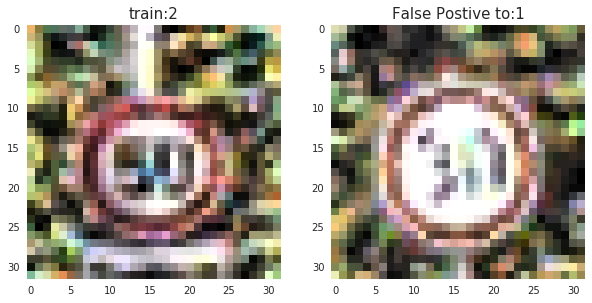

25


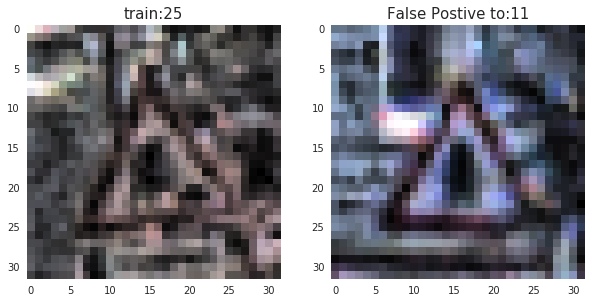

25


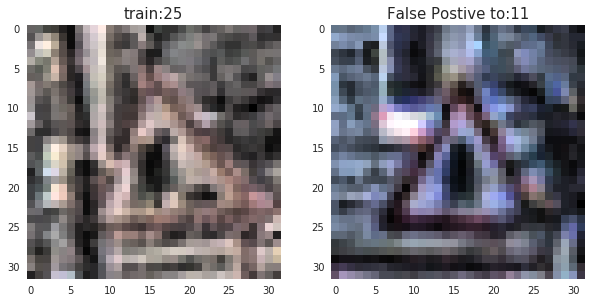

99
[41, 41, 41, 26, 1, 1, 1, 1, 1, 1, 40, 40, 40, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 3, 3, 3, 3, 3, 3, 3, 29, 29, 24, 5, 5, 5, 5, 5, 8, 8, 8, 8, 8, 35, 34, 34, 34, 34, 18, 13, 7, 30, 30, 30, 30, 30, 30, 30, 30, 30, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 33, 33, 28, 17, 2, 2, 25, 25]


In [16]:
def unnormalize_data(data):
    x = data[:,:,1].shape[0]
    y = data[:,:,1].shape[1]
    channel = len(data[0,0,:])
            
    for color in range(channel):
            image_unnorm = data[:,:,color].reshape(x*y,)
            image_unnorm -= image_unnorm.min()
            image_unnorm = 150*(image_unnorm/image_unnorm.max())
            data[:,:,color] =image_unnorm.reshape(x, y).astype(int)
    return data





false = 0
y_false=[]
for i in range(len(y_valid2)):
    if y_valid2[i] != valid_predict2[i]:
        print(y_valid2[i])
        y_false.append(y_valid2[i])
        false+=1
        # print("type-{}-image is identied wrong as {}".format(y_valid[i],valid_predict[i] ))
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
        plt.grid(False)
        image = X_valid2[i]
        #image = unnormalize_data(image)
        #fig = plt.figure(figsize=(2,2))
        ax1.set_title("train:" + str(y_valid2[i]), fontsize=15)
        ax1.grid(False)
        ax1.imshow(image)

        #plt.imshow(image)
        j = y_valid.tolist().index(valid_predict2[i])
        image = X_valid2[j]
        #image = unnormalize_data(image)
        #fig2 = plt.figure(figsize=(2,2))
        ax2.set_title("False Postive to:" + str(int(valid_predict2[i])), fontsize=15)
        ax1.grid(False)
        ax2.imshow(image)
    plt.show()


print(false)
print(y_false)
        

In [57]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
#tf.reset_default_graph()
savefile = './model2.ckpt'


with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, savefile)
#    valid_label2 = sess.run(real_label,feed_dict={y: y_valid2})

#    train_predict, train_accuracy = evaluate(X_train, y_train)
    valid_predict2, validation_accuracy2 = evaluate(X_valid2, y_valid2)
    test_predict, test_accuracy = evaluate(X_test, y_test)
#    print('accuracy: {}'.format(train_accuracy))
    print('accuracy: {}'.format(validation_accuracy2))
    print('accuracy: {}'.format(test_accuracy))

#print(classification_report(valid_label2, valid_predict2))
print(classification_report(y_valid2, valid_predict2))
print(classification_report(y_test, test_predict))


accuracy: 0.9931987552958007
accuracy: 0.97709750542565
accuracy: 0.9679334916109521
             precision    recall  f1-score   support

          0       0.94      1.00      0.97        30
          1       1.00      0.97      0.98       240
          2       0.95      1.00      0.97       240
          3       0.99      1.00      0.99       150
          4       1.00      1.00      1.00       210
          5       0.96      1.00      0.98       210
          6       1.00      1.00      1.00        60
          7       1.00      1.00      1.00       150
          8       1.00      0.93      0.97       150
          9       1.00      1.00      1.00       150
         10       1.00      1.00      1.00       210
         11       0.99      0.99      0.99       150
         12       1.00      1.00      1.00       210
         13       1.00      1.00      1.00       240
         14       1.00      1.00      1.00        90
         15       1.00      1.00      1.00        90
         16  

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['./Test_IMAGE/end_of_no_passing.jpg', './Test_IMAGE/traffic_bumpy_road2.jpg', './Test_IMAGE/traffic_s1.jpg', './Test_IMAGE/traffic_s2.jpg', './Test_IMAGE/traffic_s4.jpg', './Test_IMAGE/traffic_bumpy_road.jpg', './Test_IMAGE/traffic_s3.jpg']
0
(1, 32, 32, 3)
1
2
3
4
5
6


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


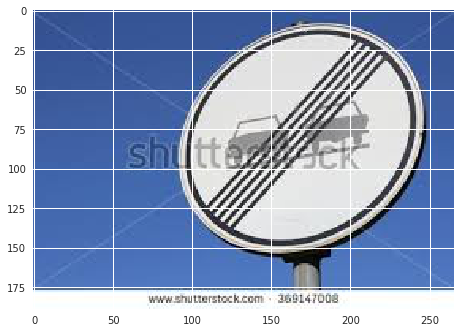

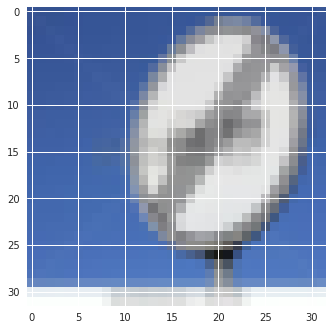

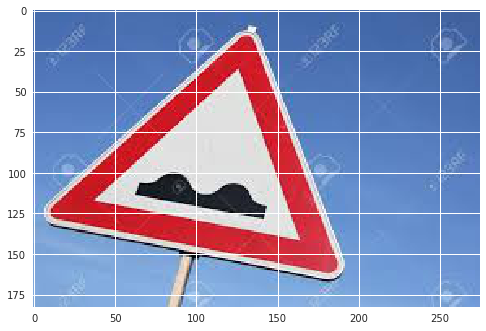

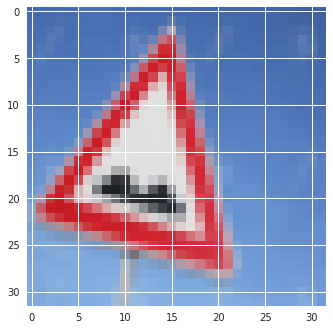

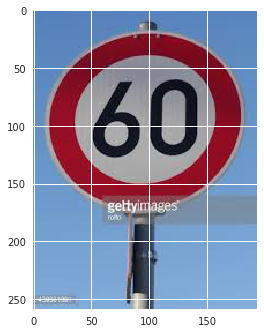

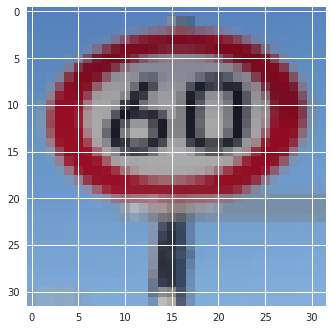

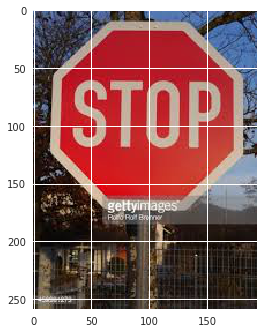

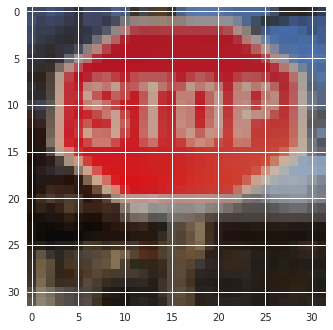

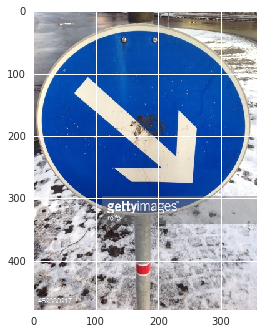

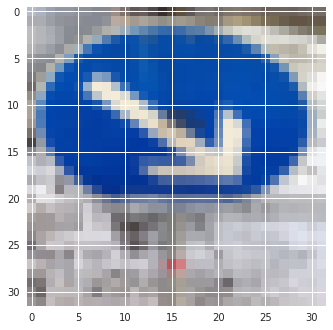

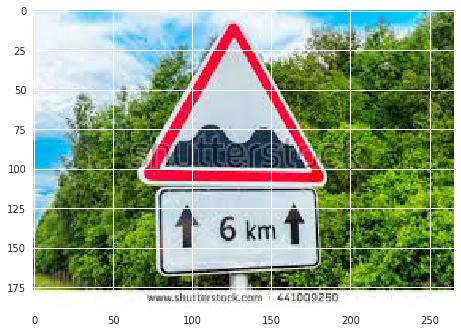

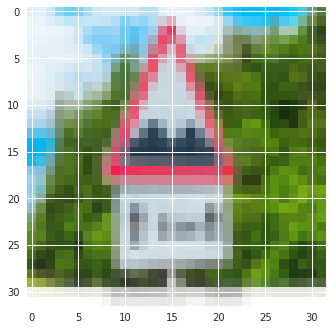

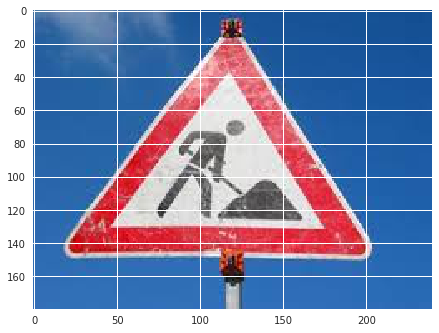

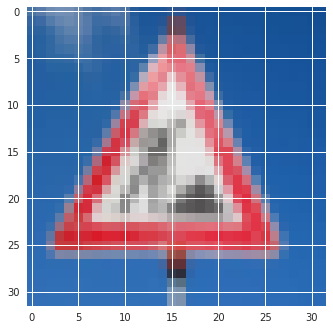

In [59]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
from PIL import Image
from scipy.misc import imresize
import os

def create_file_list(directory, key):
    filelist = []
    for root, _, files in os.walk(directory, topdown=False):
        for name in files:
            if key in name:            
                filelist.append(os.path.join(root, name))
    return filelist

def print_n_reshape(file):
    im = Image.open(file, 'r')
    width, height = im.size
    pixel_values = list(im.getdata())
    plt.figure()
    image = np.array(pixel_values).reshape((height, width, 3)).astype(np.uint8)

    plt.imshow(image)

    im_32 = imresize(image, (32,32))
    plt.figure()
    plt.imshow(im_32)
    
    return im_32

directory = "./Test_IMAGE"
file_list = create_file_list(directory, '.jpg')
n = 0
y_test3 = np.array([42, 22, 3, 14, 38, 22, 25])

print(file_list)
for file in file_list:
    im32 = print_n_reshape(file)
    print(n)
    if n == 0:
        image_all = np.array([im32])
        print(image_all.shape)
        
    else:
        
        image_all = np.concatenate((image_all, np.array([im32])))
    n+=1


image_all2 = contrast_all_image(image_all, num = 10000, train_contrast_datafile = "train_contrast_data.p")     



### Predict the Sign Type for Each Image

(7, 32, 32, 3)
(7, 32, 32, 3)
predict the labels of 7 images:[ 42.  22.   3.  14.  38.  22.  25.]
the True labels of 7 images:   [42 22  3 14 38 22 25]
the True labels of 7 images:   [42 22  3 14 38 22 25]
1.0
57.0405521474
[131 131 131]
[27 31 38]


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


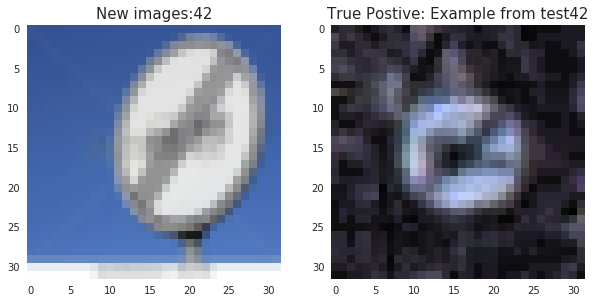

53.2806421737
[222 210 207]
[255 255 255]


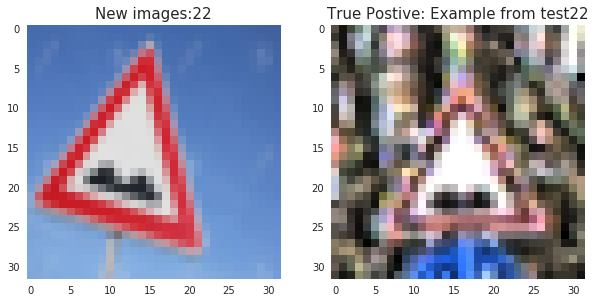

51.2598492749
[170 170 170]
[136 129 122]


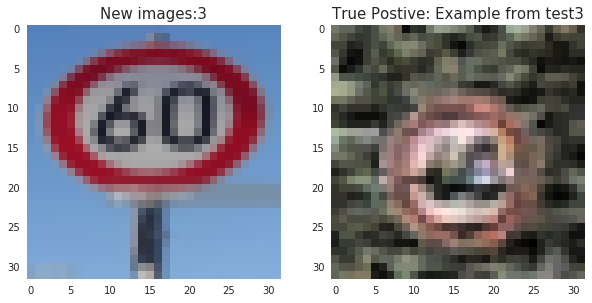

58.2870008607
[203  37  37]
[25 19 22]


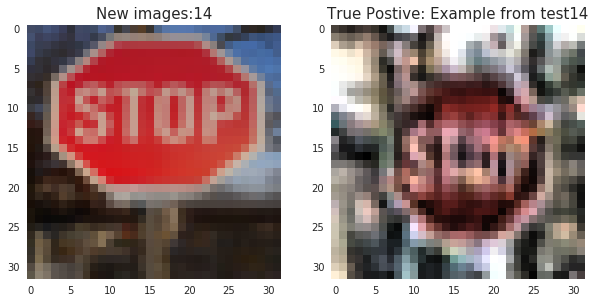

63.0745921888
[ 63  97 161]
[118 143 208]


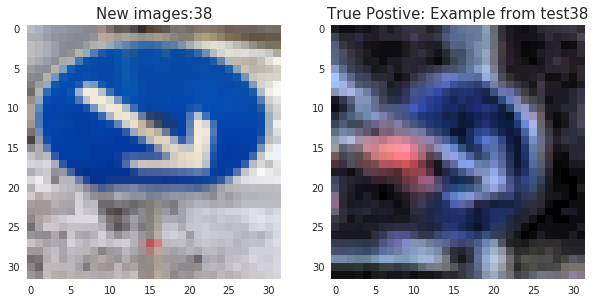

73.6564150901
[ 77  90 106]
[255 255 255]


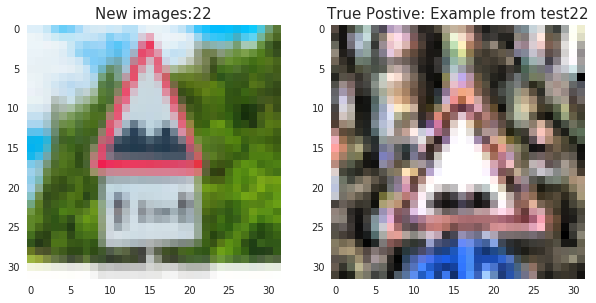

59.6548630957
[228 228 226]
[32 35 38]


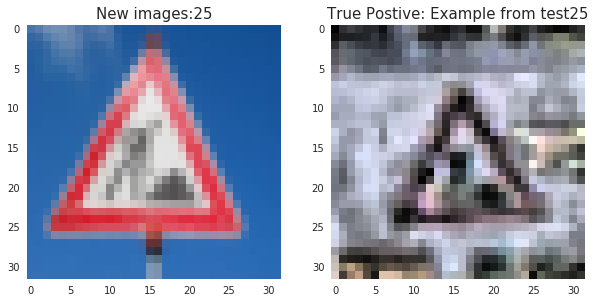

In [60]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print(image_all.shape)
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
#tf.reset_default_graph()
savefile = './model2.ckpt'



print(image_all.shape)
with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, savefile)
    valid_label = sess.run(real_label,feed_dict={y: y_test3})

    test_predict, test_accuracy = evaluate(image_all2, y_test3)

print("predict the labels of 7 images:{}".format(test_predict))
print("the True labels of 7 images:   {}".format(y_test3))
print("the True labels of 7 images:   {}".format(valid_label))
print(test_accuracy)

show = 1
for i in range(len(y_test3)):
    if show == 1:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))
        plt.grid(False)
        image = image_all[i]
        #image = unnormalize_data(image)
        #fig = plt.figure(figsize=(2,2))
        ax1.set_title("New images:" + str(y_test3[i]), fontsize=15)
        ax1.grid(False)
        ax1.imshow(image)
        print(image.std())
        print(image[16,16,:])

        if y_test3[i] != test_predict[i]:
            j = y_valid.tolist().index(test_predict[i])
            image = X_valid2[j]

            ax2.set_title("False Postive to:" + str(int(test_predict[i])), fontsize=15)
            ax2.grid(False)
            ax2.imshow(image)
            print(image[16,16,:])
        #plt.show()
        else:
            k = y_valid2.tolist().index(y_test3[i])
            image = X_valid2[k]
        #image = unnormalize_data(image)
        #fig2 = plt.figure(figsize=(2,2))
            ax2.set_title("True Postive: Example from test" + str(int(y_test3[i])), fontsize=15)
            ax2.grid(False)
            ax2.imshow(image)
            print(image[16,16,:])
            plt.show()

### Analyze Performance

In [61]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("The accuracy of these 7 images: {}".format(test_accuracy))

The accuracy of these 7 images: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [62]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)

savefile = './model2.ckpt'

def top_K(X_data, y_data, k0 = 3):
    num_examples = len(X_data)

    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]

        softmax0 = sess.run(softmax, feed_dict={x: batch_x, y: batch_y, keep_prob1: 1,keep_prob2: 1,keep_prob3: 1 })
        top_k = sess.run(tf.nn.top_k(softmax0, k=k0))

    return top_k



with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, savefile)
    top_5= sess.run(real_label,feed_dict={y: y_test3})

    top_k = top_K(image_all, y_test3, k0 = 5)

print(len(image_all))
print(top_k)


7
TopKV2(values=array([[  6.17149770e-02,   5.21326847e-02,   5.07067889e-02,
          3.95625122e-02,   3.82742323e-02],
       [  6.36283994e-01,   3.63611013e-01,   1.04530787e-04,
          3.88264340e-07,   4.06212557e-08],
       [  9.99601424e-01,   2.49713223e-04,   1.33515205e-04,
          1.51527402e-05,   2.12329269e-07],
       [  9.99794900e-01,   2.05157863e-04,   5.34416975e-17,
          2.89148193e-21,   1.62355925e-21],
       [  1.00000000e+00,   1.45829174e-23,   1.49039847e-31,
          2.05132342e-33,   3.51173106e-34],
       [  4.49954033e-01,   3.39788824e-01,   1.34056926e-01,
          3.00685149e-02,   2.96117142e-02],
       [  1.00000000e+00,   5.54054754e-15,   1.27512700e-15,
          3.58843440e-18,   3.53695063e-20]], dtype=float32), indices=array([[ 5, 40,  2, 35,  1],
       [22, 29, 25, 31, 23],
       [ 3,  5, 29, 28,  1],
       [14, 17,  5, 13, 10],
       [38, 34, 40, 36, 29],
       [22, 15, 26, 25, 29],
       [25, 29, 11, 28, 30]], dtype=

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


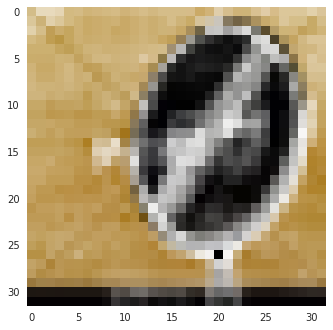

16


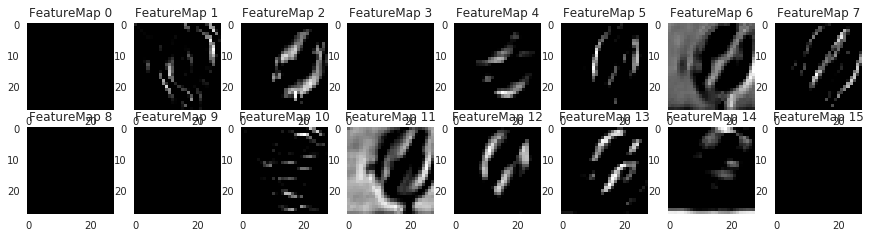

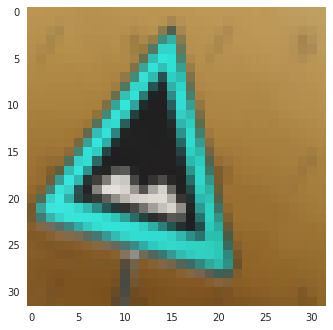

16


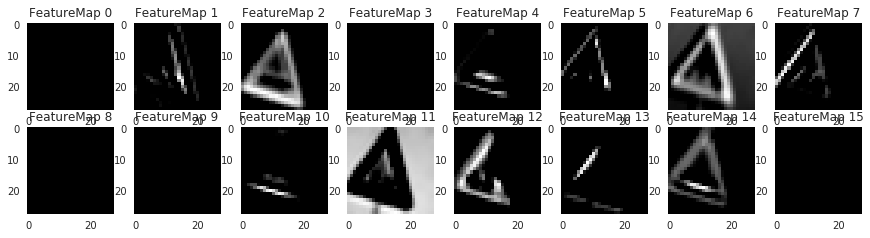

In [64]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    #image_input =exposure.equalize_adapthist(image_input)

    image_input = (image_input*255).astype(np.uint8)
    plt.figure()
    plt.grid(False)
    plt.imshow(image_input)
    plt.show()
    image_input = np.array([image_input])
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, keep_prob1: 1,keep_prob2: 1,keep_prob3: 1 })
    featuremaps = activation.shape[3]
    print(featuremaps)
    plt.figure(plt_num, figsize=(15,15))
    
    for featuremap in range(featuremaps):
        plt.subplot(8,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.grid(False)
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()
            
with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, savefile)
    outputFeatureMap(image_all2[0], conv1, activation_min=-1, activation_max=-1 ,plt_num=1)
with tf.Session() as sess:
    # Load the weights and bias - No Error
    saver.restore(sess, savefile)
    outputFeatureMap(image_all[1], conv1, activation_min=-1, activation_max=-1 ,plt_num=1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 